# Campos de dados utilizados 
A maioria dos campos é autoexplicativa. A seguir estão as descrições daqueles que não o são.

Campos de Dados
A maioria dos campos é autoexplicativa. As seguintes são descrições para aqueles que não são.

Id - um ID que representa um par (Loja, Data) dentro do conjunto de teste

Store- um ID único para cada loja

Sales - a receita para qualquer dia específico (isso é o que você está prevendo)

Customers - o número de clientes em um determinado dia

unclosed - um indicador se a loja estava aberta: 0 = fechada, 1 = aberta

StateHoliday- indica um feriado estadual. Normalmente todas as lojas, com poucas exceções, estão fechadas em feriados estaduais. Note que todas as escolas estão fechadas em feriados públicos e fins de semana. a = feriado público, b = feriado de Páscoa, c = Natal, 0 = Nenhum

SchoolHoliday- indica se (Loja, Data) foi afetado pelo fechamento de escolas públicas

StoreType- diferencia entre 4 modelos de loja diferentes: a, b, c, d

Assorment- descreve um nível de sortimento: a = básico, b = extra, c = estendido

CompetitionDistance- distância em metros até a loja concorrente mais próxima

CompetitiomOpenSince[Month/Year] - fornece o ano e mês aproximados em que o concorrente mais próximo foi aberto

Promo- indica se uma loja está realizando uma promoção naquele dia

Promo2- Promoção2 é uma promoção contínua e consecutiva para algumas lojas: 0 = loja não está participando, 1 = loja está participando

Promo2Since[Year/Week] - descreve o ano e a semana do calendário em que a loja começou a participar da Promoção2

PromoInterval - descreve os intervalos consecutivos em que a Promoção2 é iniciada, nomeando os meses em que a promoção é iniciada novamente. Por exemplo, "Fev, Mai, Ago, Nov" significa que cada rodada começa em fevereiro, maio, agosto, novembro de qualquer ano para essa loja.

# Importando as biblitoecas necessárias 

In [1]:
import math #Para operações matemáticas.
import numpy as np #Para operações numéricas.
import pandas as pd #Para manipulação e análise de dados tabulares.
from tabulate import tabulate #Permite formatar dados tabulares de forma legível em texto, como tabelas.
import inflection #Para manipulação de strings.
import seaborn   as sns #Usada para aprimorar a visualização de dados em gráficos.
import datetime #Para trabalhar com datas e horas.
from matplotlib.gridspec import GridSpec #Para criar uma grade de subplots.
from matplotlib import pyplot as plt #Para criação de gráficos e visualizações.
from IPython.display import Image #Usada para exibir uma imagem do mapa mental de hipóteses.

# Loading Data

In [2]:
df_sales_raw = pd.read_csv('C:/Users/User/Desktop/arquivocsv/train.csv', low_memory=False)
df_store_raw = pd.read_csv('C:/Users/User/Desktop/arquivocsv/store.csv', low_memory=False)

# mesclando
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

##### Por que é usado 'low_memory=False'? 
= Porque desejamos forçar o pandas a não otimizar a alocação de memória ao ler o arquivo CSV, priorizando o desempenho na leitura, mesmo que isso possa resultar em um uso maior de memória.
Usar 'low_memory=False' para desativar a otimização de alocação de memória ao ler um arquivo CSV pode ser benéfico em alguns casos, especialmente quando você lida com arquivos CSV grandes ou quando a otimização de memória está causando problemas de desempenho.

In [3]:
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# Descrição dos Dados

In [4]:
df1 = df_raw.copy()

##### Por que fazemos uma nova cópia de um dataframe? 
= Ao criar uma cópia do DataFrame, você preserva os dados originais no DataFrame original, que neste caso é (df_raw). Isso é fundamental para evitar a perda de dados ou informações importantes durante a manipulação e transformação de dados.

# Rename Columns

In [5]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday',
            'StoreType', 'Assortment','CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']


snakecase = lambda x: inflection.underscore(x)


cols_new = list(map(snakecase, cols_old))

#rename
df1.columns = cols_new

##### Snakecase, o que seria?
= É uma função lambda que foi definida para converter uma string de entrada em snake_case. No código fornecido, ela usa a função underscore da biblioteca inflection para realizar essa conversão.

##### underscore? 
= Underscore é uma função da biblioteca inflection que converte uma string de entrada em snake_case. Por exemplo, ela converte "CamelCase" em "camel_case" e "PascalCase" em "pascal_case".

##### E esse map? 
= O map é uma função incorporada do Python que é usada para aplicar uma função a todos os itens de uma sequência e retornar um novo objeto com os resultados. No contexto do código, a função map está sendo usada para aplicar a função snakecase a cada elemento da lista cols_old, que contém os nomes das colunas originais. Isso resulta em uma nova lista, cols_new, com os nomes das colunas em snake_case.

In [7]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

# Data Dimensions

In [8]:
print( "Number of Rows: {}". format(df1.shape[0]))
print( "Number of Cols: {}". format(df1.shape[1]))

Number of Rows: 1017209
Number of Cols: 18


# Data Types

In [9]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [10]:
df1['date'] = pd.to_datetime(df1['date'])

#Convertendo em datetime, porque na linha 14 será necessário modelar alguns dados no type (tipo) datetime.

In [11]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

# Check Not-a-Number 

In [12]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

# Fillout Not-a-Number

In [13]:
df1['competition_distance'].max()

75860.0

In [14]:
#competition_distance
df1['competition_distance']= df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

#competition_open_since_month
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)
# A função verifica se o valor em 'competition_open_since_month' é NaN. Se for NaN, ele substitui pelo mês extraído da coluna 'date' da mesma linha. Caso contrário, mantém o valor existente.
#competition_open_since_year
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)
                           
#promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

#promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

#promo_interval
month_map = {1: 'Jan', 2: 'Feb', 3:'Mar', 4: 'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True)

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [15]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

# Changing Types 

In [16]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [17]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [18]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

# Descriptive Statistical

In [19]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [20]:
num_attributes = df1.select_dtypes(include=['int64', 'int32', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'int32', 'float64', 'datetime64[ns]'])

##### Num_attributes? 

Isso cria um novo DataFrame chamado num_attributes.
Ele seleciona todas as colunas do DataFrame df1 que têm tipos de dados numéricos, incluindo int64, int32 e float64.
Portanto, num_attributes conterá apenas as colunas que armazenam números inteiros ou float.


##### Cat_attributes? 
Isso cria outro novo DataFrame chamado cat_attributes.
Ele seleciona todas as colunas do DataFrame df1 que não são do tipo int64, int32, float64, nem datetime64[ns].
Portanto, cat_attributes conterá as colunas que não são numéricas (por exemplo, colunas de texto, categoria ou outras) e que não são do tipo data e hora.
Essa divisão é comum ao realizar análises de dados, pois permite separar colunas numéricas (que podem ser usadas em cálculos estatísticos).

## Numerical Attributes

In [21]:
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

d1 = pd.DataFrame(num_attributes.apply(np.std)).T
#Qual o sentido de calcular um desvio padrão? (np.std) 
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T


m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()

##### Explicando a primeira linha
= num_attributes.apply(np.mean) aplica a função np.mean com a biblioteca NumPy (que calcula a média) a cada coluna em num_attributes. Isso calcula a média de cada coluna numérica.
pd.DataFrame(...).T cria um DataFrame a partir dos resultados calculados e, em seguida, inverte as linhas e colunas. A transposição é feita usando .T no final da criação do DataFrame.



##### ***Qual o sentido de calcular um desvio padrão? (np.std)*** 
O desvio padrão é uma medida de quão distantes os valores individuais estão da média em um conjunto de dados. Ele é usado para entender a dispersão dos dados e responder a perguntas como:

***Quão dispersos estão os dados?*** O desvio padrão fornece uma ideia da variabilidade dos dados. Quanto maior o desvio padrão, mais dispersos os dados estão em relação à média. Um desvio padrão pequeno indica que os dados estão mais próximos da média.

***Como os valores individuais se comparam à média?*** O desvio padrão ajuda a identificar quais valores estão mais próximos da média e quais estão mais distantes. Valores que estão a uma ou duas vezes o desvio padrão da média são considerados comuns, enquanto valores muito distantes da média podem ser considerados outliers.

***Comparação de grupos*** Quando se compara a variabilidade de dois ou mais grupos de dados, o desvio padrão é útil. Ele ajuda a determinar se um grupo é mais variável do que outro, o que pode ter implicações importantes em estudos comparativos.



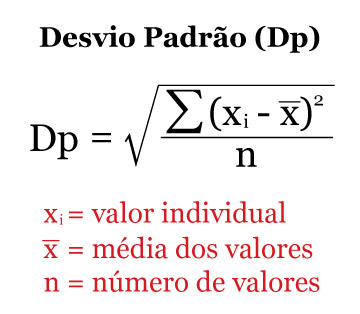

In [70]:
#Fórmula do desvio padrão
Image("C:/Users/User/Desktop/desvio-padrao-matematica.jpg") 

##### Skew, range, kurtosis?
O cálculo do skew (assimetria), kurtosis (curtose) e range (amplitude) são medidas estatísticas que fornecem informações adicionais sobre a distribuição dos dados, além da média e do desvio padrão. 

Skew (Assimetria):

O skew (ou assimetria) mede a inclinação ou assimetria da distribuição dos dados em relação à média.
Uma distribuição simétrica terá um skew próximo a zero. Um skew positivo indica uma cauda longa à direita da distribuição (maior concentração de valores abaixo da média), enquanto um skew negativo indica uma cauda longa à esquerda da distribuição (maior concentração de valores acima da média).
O skew é útil para identificar se a distribuição dos dados é simétrica ou assimétrica e em que direção ela se inclina.



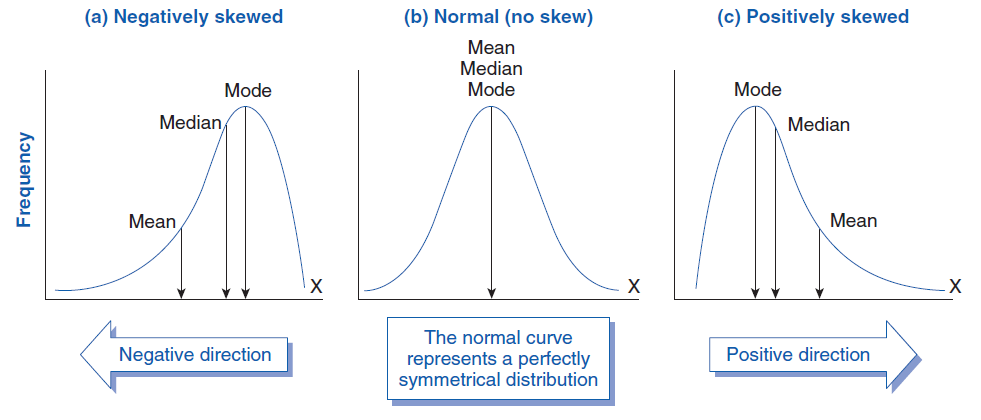

In [75]:
#Explicação das caudas do skewness
Image("C:/Users/User/Desktop/c101b0da6ea1a0dab31f80d9963b0368_orig.png") 

#### Kurtosis, range? 
Kurtosis (Curtose):

O kurtosis (ou curtose) mede o grau de achatamento ou picos na distribuição dos dados em relação a uma distribuição normal (distribuição com curtose zero).
Uma curtose positiva (maior que zero) indica que a distribuição tem uma forma mais afilada (pico mais alto e caudas mais pesadas) em relação à distribuição normal. Uma curtose negativa (menor que zero) indica que a distribuição é mais achatada e dispersa em relação à distribuição normal.
O kurtosis ajuda a identificar se os dados têm caudas pesadas (valores extremos) em comparação com uma distribuição normal.
Range (Amplitude):

A amplitude (ou range) é a diferença entre o valor máximo e o valor mínimo em um conjunto de dados.
É útil para entender a faixa de valores em que os dados estão distribuídos.

In [22]:
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


## Categorical Attributes

In [76]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

##### Explicação do CatAtt 
= lambda x: x.unique().shape[0]: Esta é a função lambda que será aplicada a cada coluna.

x representa cada coluna do DataFrame cat_attributes.

x.unique() retorna uma série contendo os valores únicos na coluna x. Isso remove duplicatas e deixa apenas os valores distintos.

.shape[0] é usado para obter o número de elementos na série resultante, que corresponde ao número de valores únicos na coluna x.

<Axes: xlabel='assortment', ylabel='sales'>

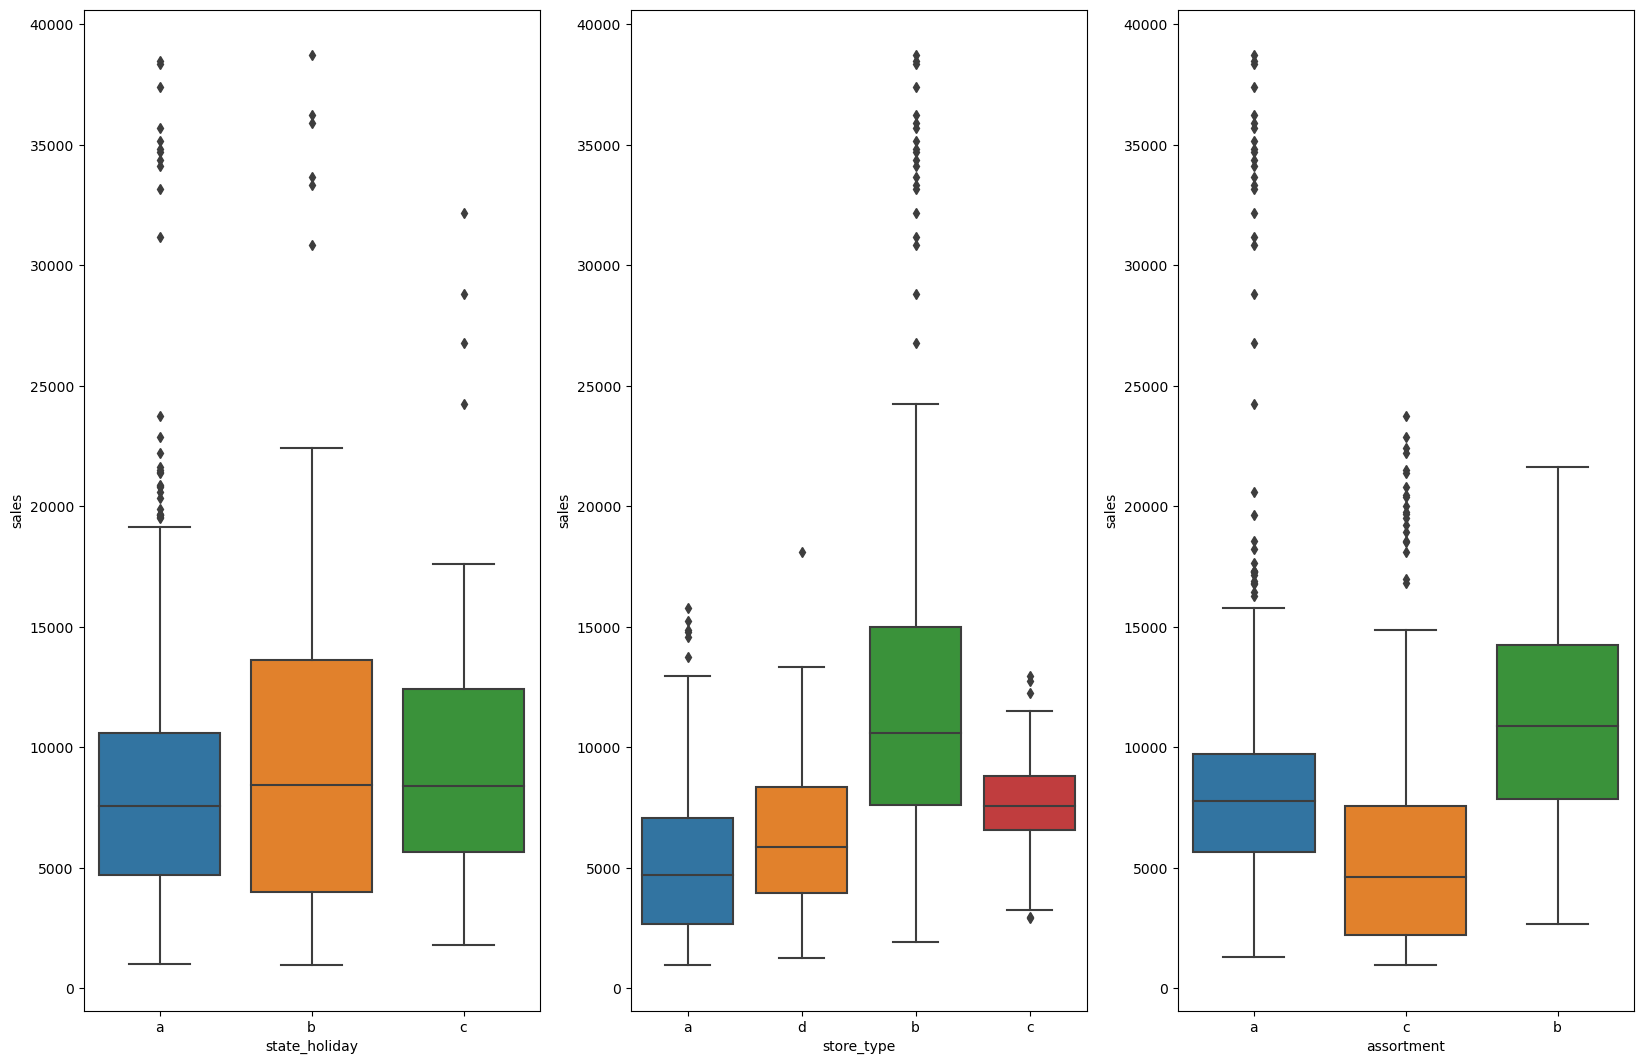

In [24]:
aux1 = df1[(df1['state_holiday'] != '0' ) & (df1['sales']>0)]

plt.figure(figsize=(20,13))

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=aux1)

# Feature Engineering

In [25]:
df2 = df1.copy()

## Mapa Mental de Hipoteses

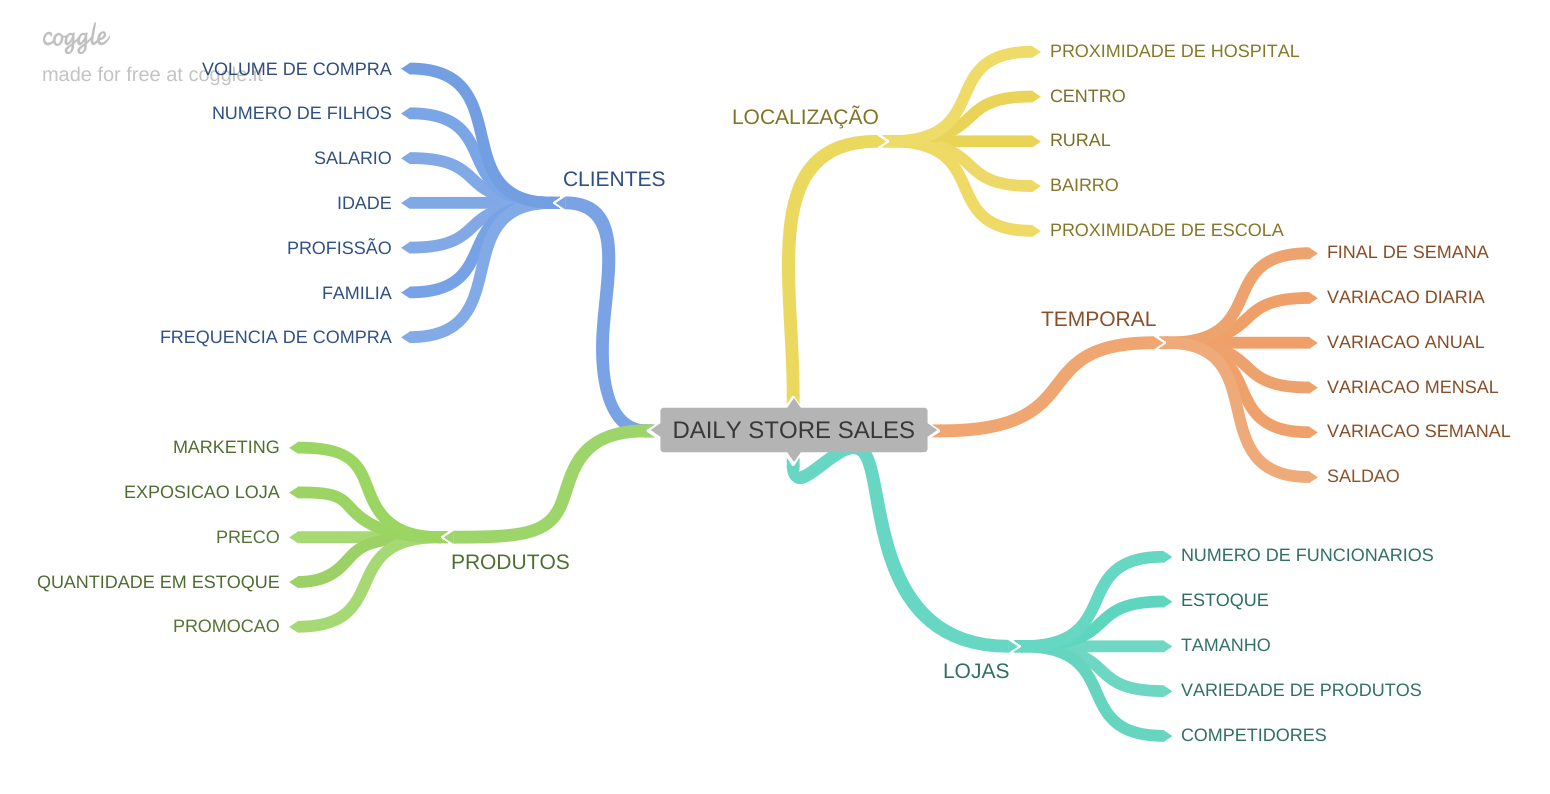

In [55]:
Image('C:/Users/User/Desktop/MindMapHypotesis.png')

##  Criacao das Hipoteses

### Hipoteses Loja

**1.** Loja com maior quadro de funcionarios deveria vender mais

**2.** Lojas com estoque maior vendem mais

**3.** Lojas com maior porte deveriam vender mais

**4.** Lojas com menor porte deveriam vender menos

**5.** Lojas com maior variedade de produtos deveriam vender mais

### Hipoteses Produto

**1.** Lojas que investem mais em Marketing deveriam vender mais

**2.** Lojas que expõem mais os produtos nas vitrines deveriam vender mais

**3.** Lojas que tem preços menores deveriam vender mais

**4.** Lojas que tem preços menores por mais tempo deveriam vender mais


###  Hipoteses Tempo

**1.** Lojas que abrem aos feriados deveriam mais

**2.** Lojas que abrem nos primeiros 6 meses deveriam mais

**3.** Lojas que abrem nos finais de semana deveriam vender mais

### Lista Final de Hipoteses

-> Interessante usar como criterio de decisao a disponibilidade dos dados que possui no momento

**1.** Lojas com maior variedade de produtos deveriam vender mais

**2.** Lojas com competidores mais próximos deveriam vender menos

**3.** Lojas com competidores a mais tempo deveriam vender mais

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais

**5.** Lojas com mais dias de promoção deveriam vender mais

**6.** Lojas com mais promoções consecutivas deveriam vender mais

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais

**8.** Lojas deveriam vender mais ao longo dos anos

**9.** Lojas deveriam vender mais no segundo semestre do ano

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês

**11.** Lojas deveriam vender menos aos finais de semana

**12.** Lojas deveriam vender menos durante os feriado escolares

### 2. Feature Engineering



In [27]:
#year
df2['year'] = df2['date'].dt.year

#month
df2['month'] = df2['date'].dt.month

#day
df2['day'] = df2['date'].dt.day

#week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

#year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

#competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

#promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)

#assortment

#state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x =='b' else 'christmas' if x =='c' else 'regular_day')

In [28]:
df2.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


# Filtragem de Variaveis

In [29]:
df3 = df2.copy()

In [30]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## Filtragem das Linhas

In [31]:
df3 = df3[(df3['open']!= 0) & (df3['sales'] > 0)] 

##  Seleção das Colunas

In [32]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop(cols_drop, axis=1)

In [33]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# Análise Exploratória dos Dados

In [34]:
df4 = df3.copy()

In [35]:
df4

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,a,1270.0,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,a,570.0,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,a,14130.0,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,c,620.0,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,a,29910.0,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,0,public_holiday,1,b,a,150.0,...,0,2013,1,1,1,2013-00,2006-09-01,77,2012-12-31,0
1016827,733,2,2013-01-01,10765,0,public_holiday,1,b,b,860.0,...,0,2013,1,1,1,2013-00,1999-10-01,161,2012-12-31,0
1016863,769,2,2013-01-01,5035,0,public_holiday,1,b,b,840.0,...,1,2013,1,1,1,2013-00,2013-01-01,0,2012-11-19,6
1017042,948,2,2013-01-01,4491,0,public_holiday,1,b,b,1430.0,...,0,2013,1,1,1,2013-00,2013-01-01,0,2012-12-31,0


## Analise Univariada

###  Resposta da Variavel

<Axes: xlabel='sales', ylabel='Density'>

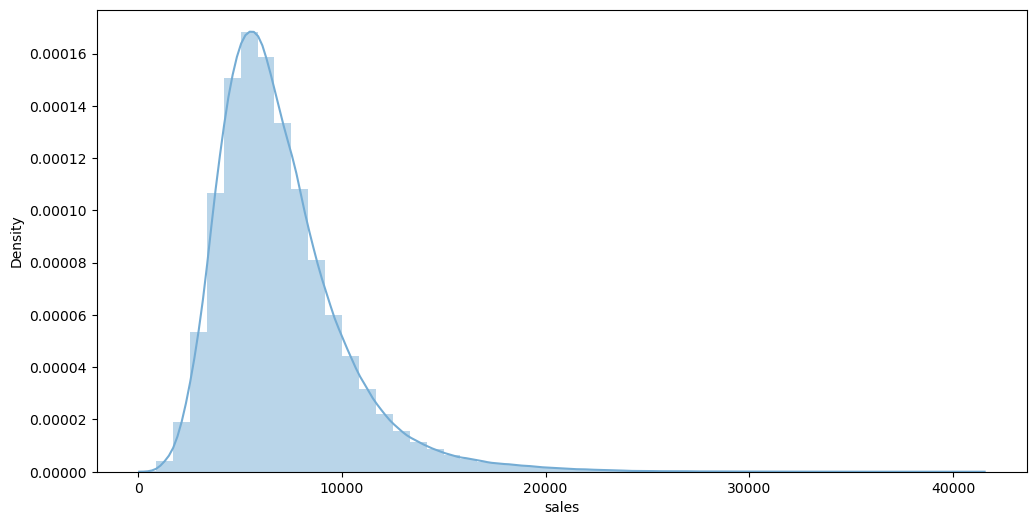

In [36]:
ax = sns.histplot(df4['sales'], stat="density", element="step", bins=50, kde=True, color='#74acd4', lw=0)
ax.figure.set_size_inches(12, 6)
ax

### Variavel Numerica

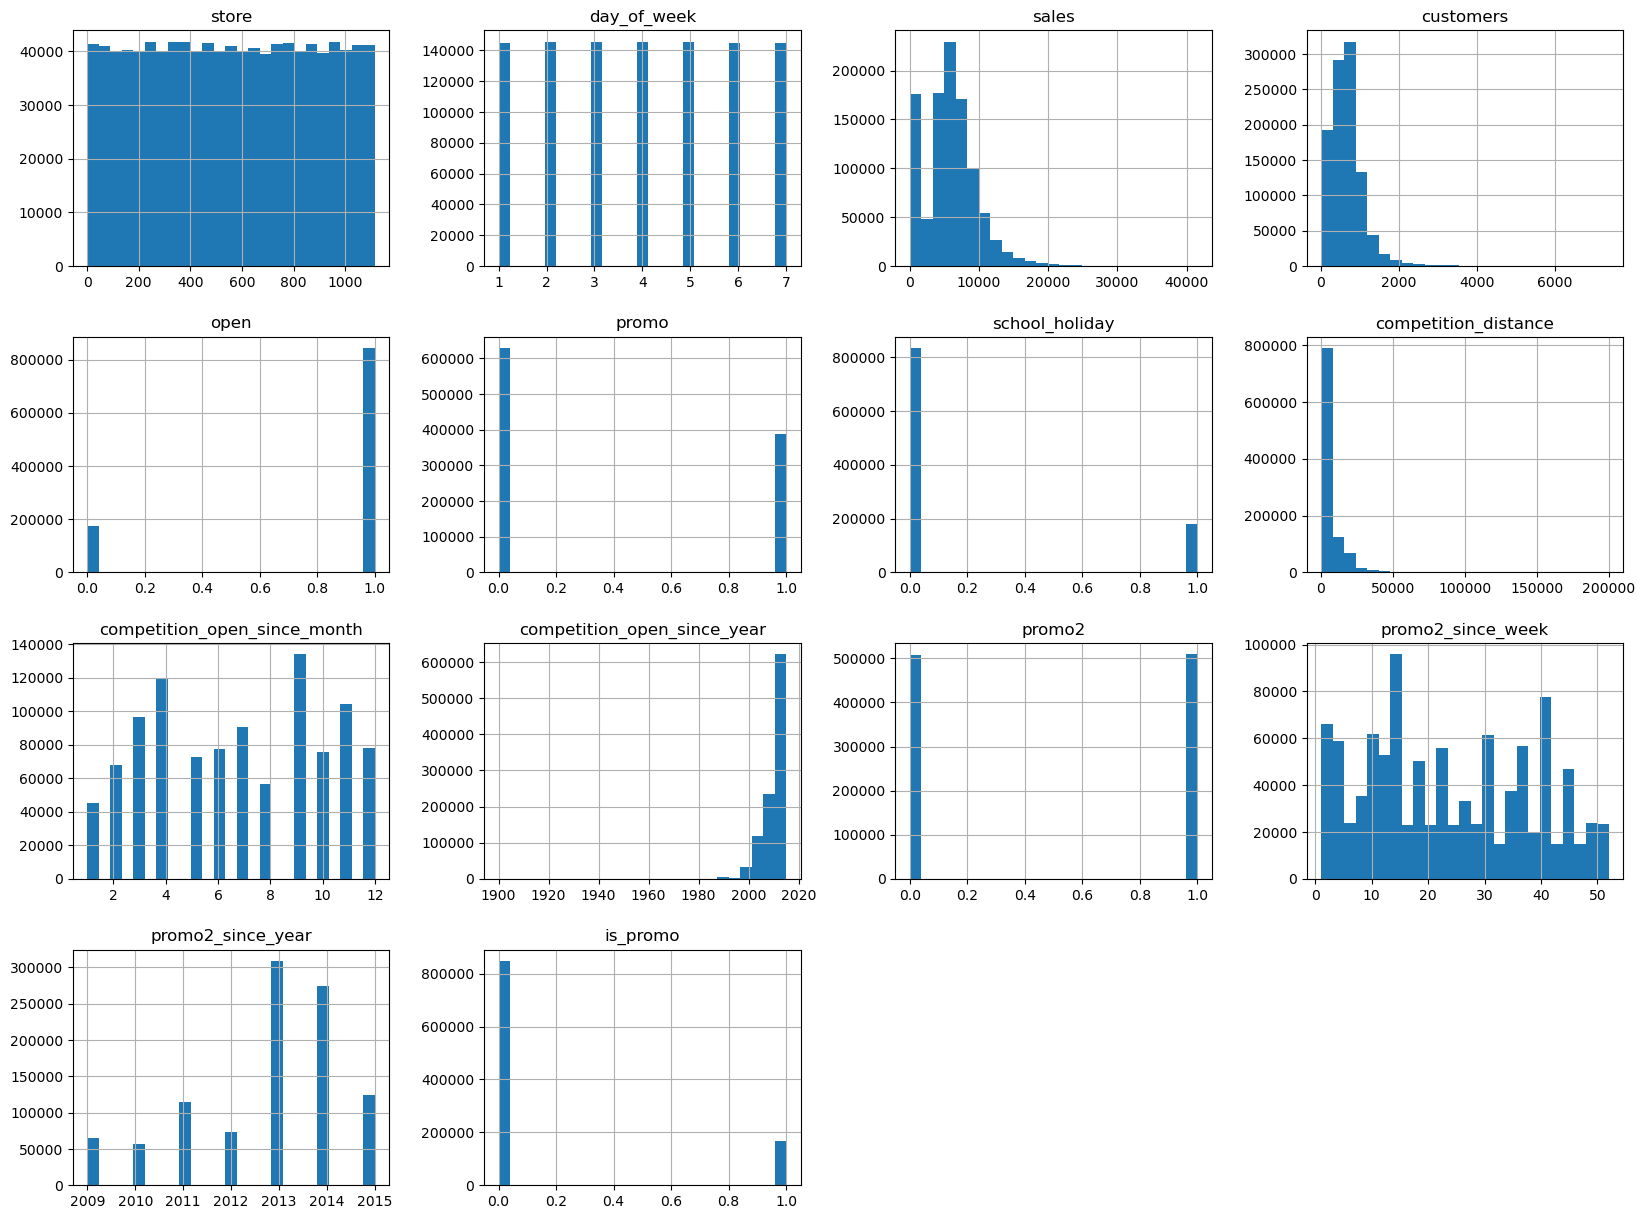

In [37]:
num_attributes.hist(bins=25, figsize=(20,15));

### Variavel Categorica

<Axes: >

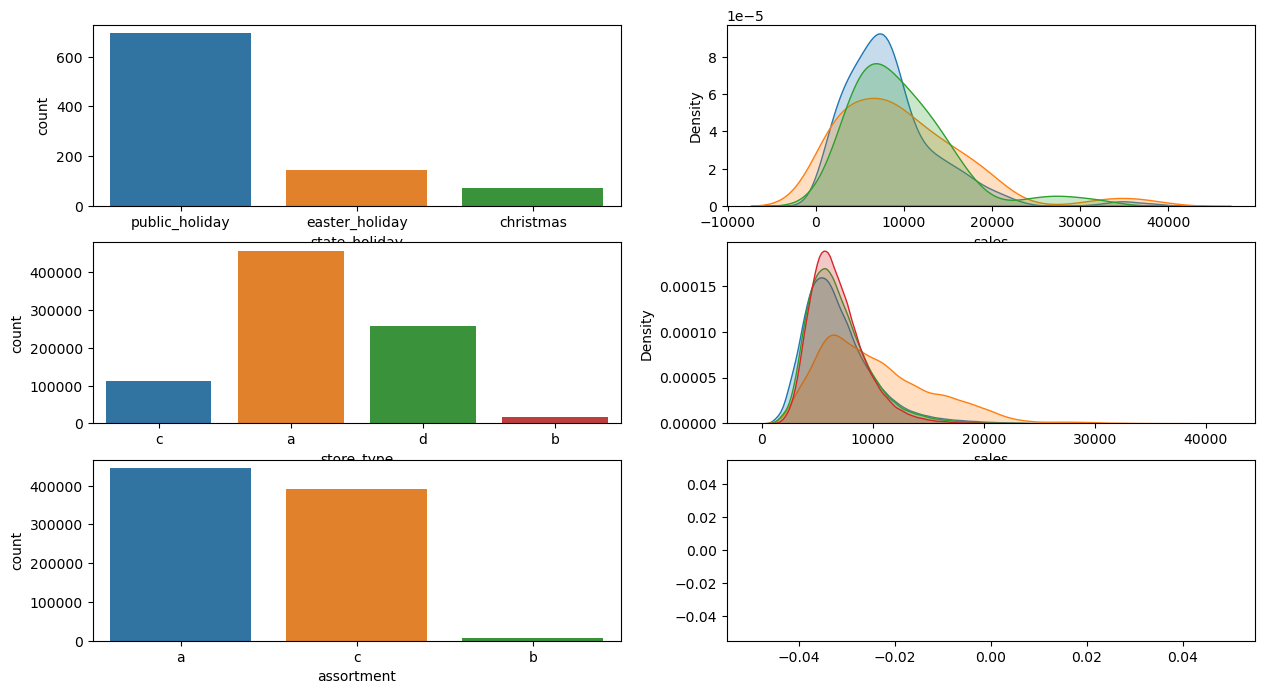

In [38]:
# state_holiday

plt.figure(figsize=(15,8))

plt.subplot( 3, 2, 1 )
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(a['state_holiday'], x=(a['state_holiday']))

plt.subplot( 3, 2, 2 )
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', fill=True )
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', fill=True )
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'],label='christmas', fill=True )

# store_type
plt.subplot( 3, 2, 3 )
sns.countplot( x= (df4['store_type']))

plt.subplot( 3, 2, 4 )
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], label='a', fill=True )
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], label='b', fill=True )
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], label='c', fill=True )
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], label='d', fill=True )

# assortment
plt.subplot( 3, 2, 5 )
sns.countplot( x=(df4['assortment'] ))

plt.subplot( 3, 2, 6 )
sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], label='extended', fill=True )
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'], label='basic', fill=True )
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'], label='extra', fill=True )

##  Analise Bivariada

### **1.** Lojas com maior variedade de produtos deveriam vender mais

**FALSA** Lojas com MAIOR VARIEDADE vendem MENOS

In [39]:
df4

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,a,1270.0,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,a,570.0,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,a,14130.0,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,c,620.0,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,a,29910.0,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,0,public_holiday,1,b,a,150.0,...,0,2013,1,1,1,2013-00,2006-09-01,77,2012-12-31,0
1016827,733,2,2013-01-01,10765,0,public_holiday,1,b,b,860.0,...,0,2013,1,1,1,2013-00,1999-10-01,161,2012-12-31,0
1016863,769,2,2013-01-01,5035,0,public_holiday,1,b,b,840.0,...,1,2013,1,1,1,2013-00,2013-01-01,0,2012-11-19,6
1017042,948,2,2013-01-01,4491,0,public_holiday,1,b,b,1430.0,...,0,2013,1,1,1,2013-00,2013-01-01,0,2012-12-31,0


<Axes: xlabel='date'>

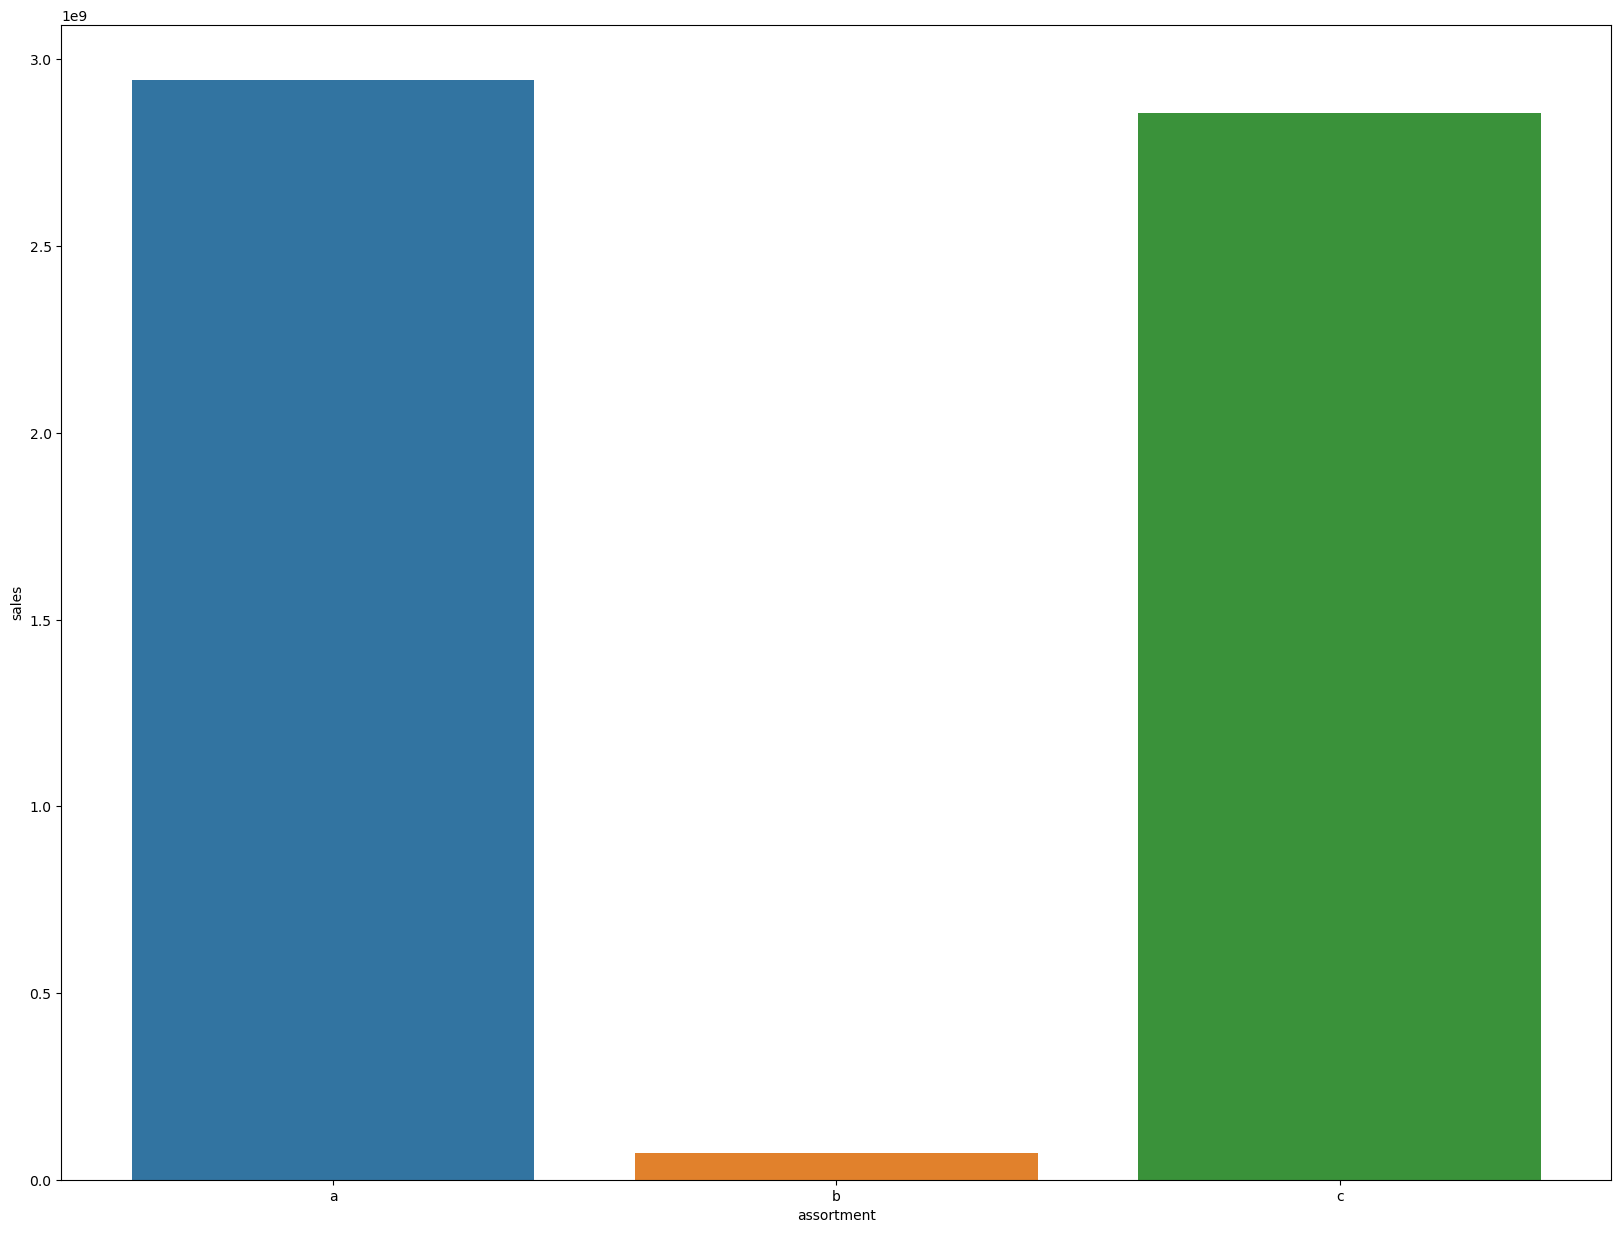

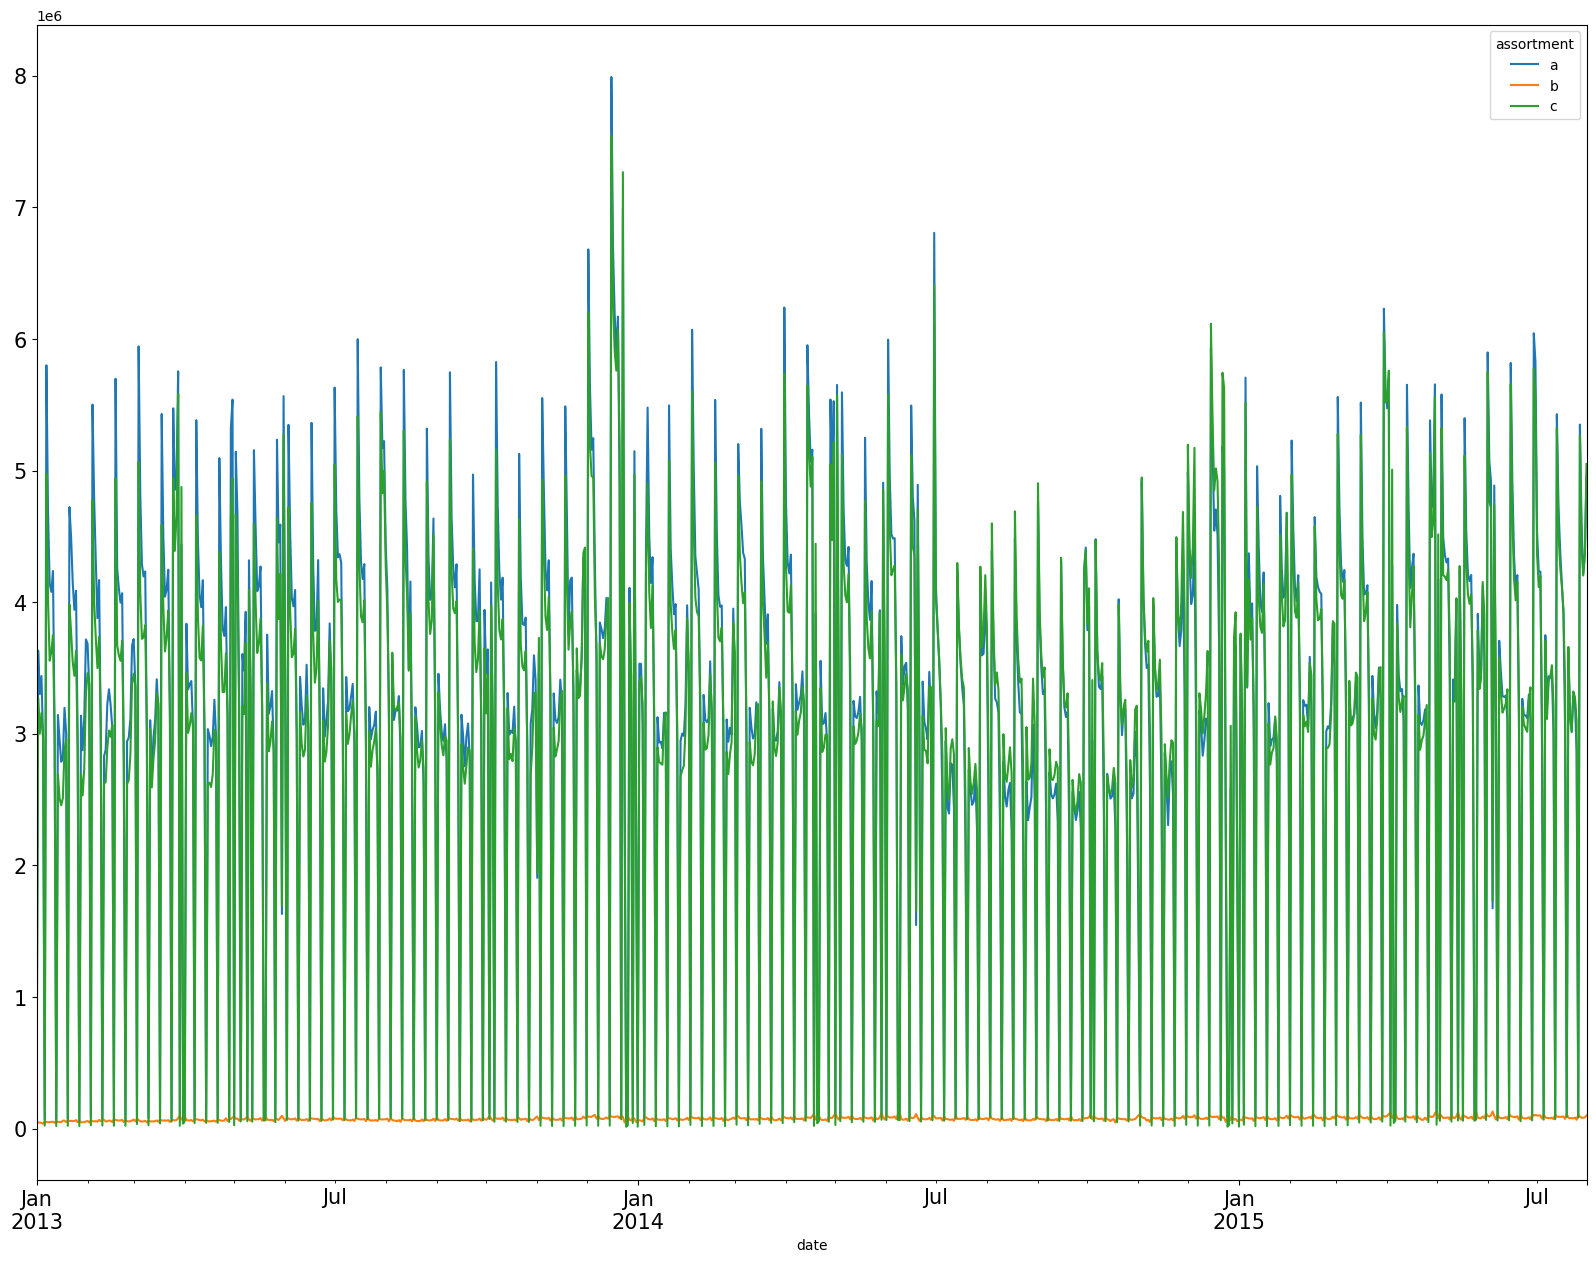

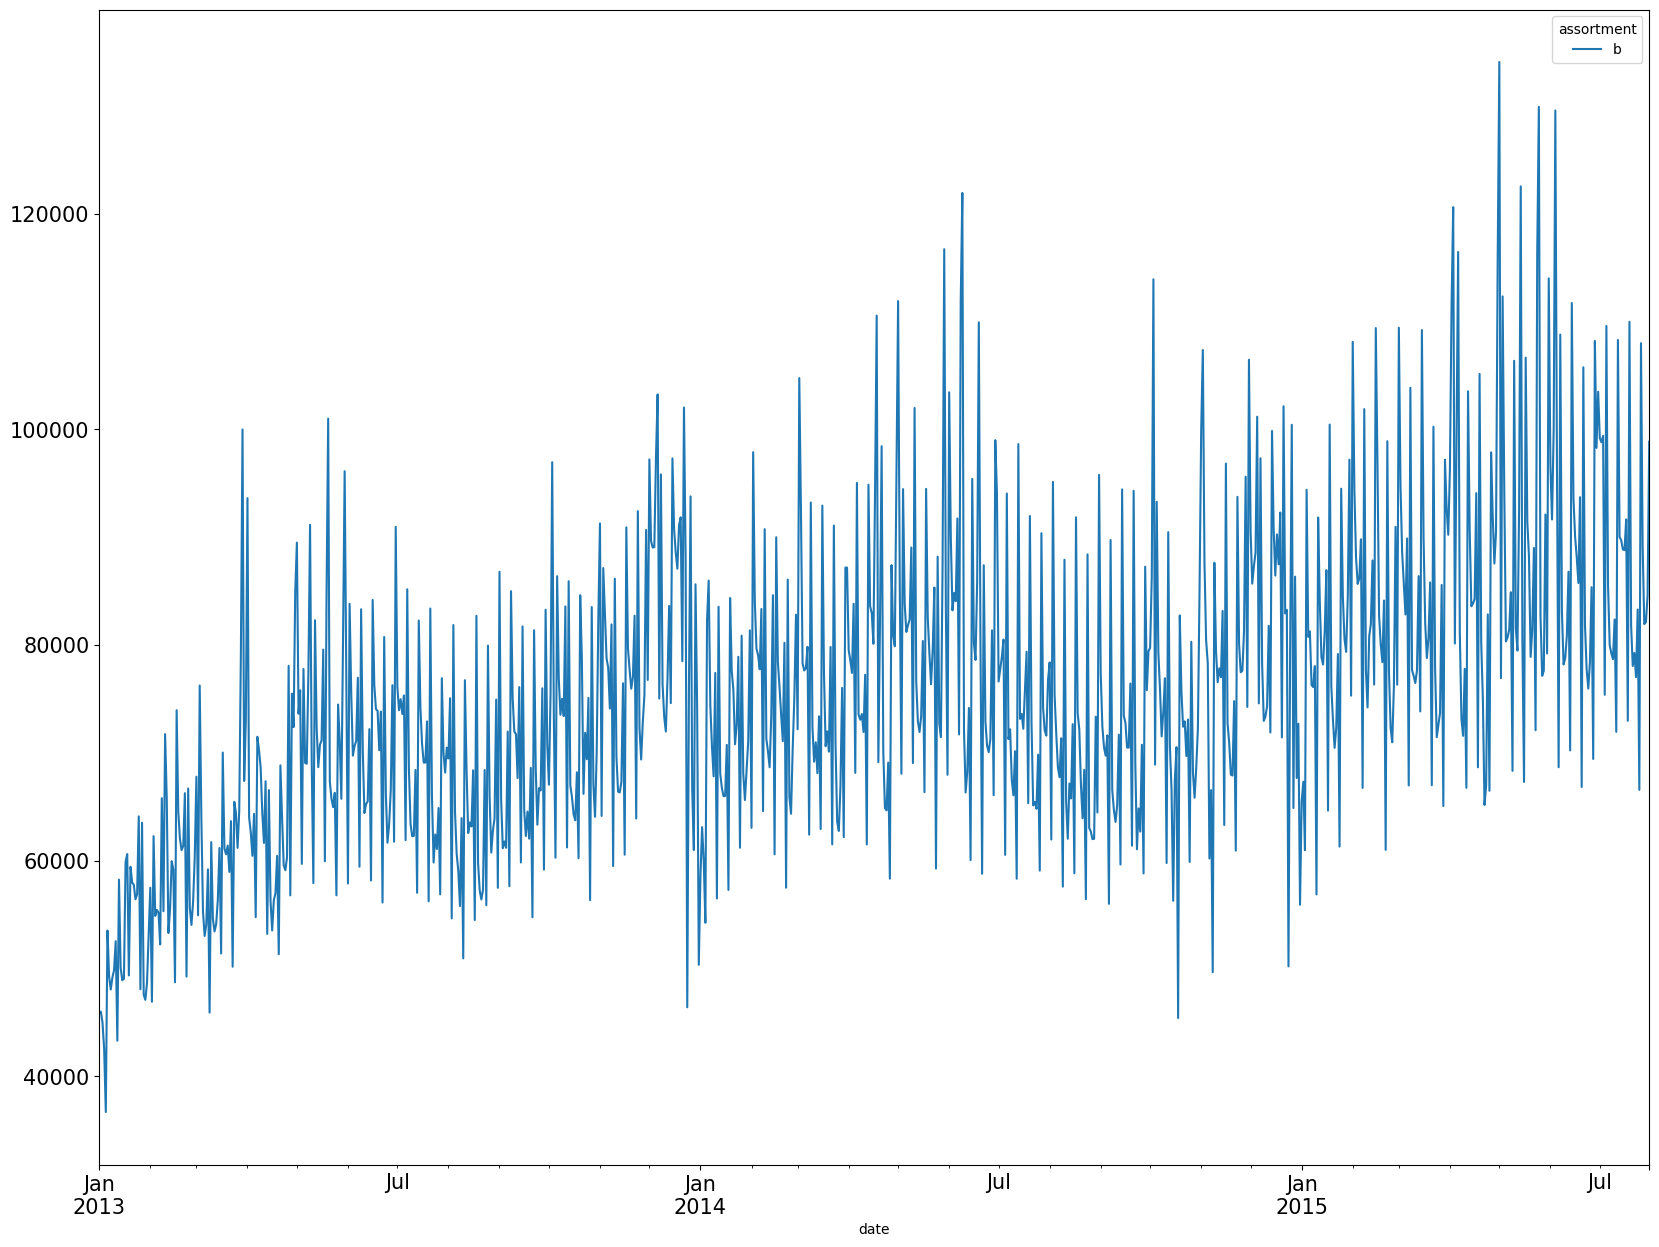

In [65]:
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot(x = 'assortment', y = 'sales', data = aux1).plot(fontsize=100)

aux2 = df4[['date','assortment', 'sales']].groupby(['date','assortment']).sum().reset_index()
aux2.pivot(index= 'date', columns= 'assortment', values='sales').plot(fontsize=(15))

aux3 = aux2[aux2['assortment'] == 'b']
aux3.pivot(index='date', columns='assortment', values='sales').plot(fontsize=(15))

### **2.** Lojas com competidores mais próximos deveriam vender menos

**FALSA** Lojas com competidores MAIS PRÓXIMOS vendem MAIS

C:\Users\User\AppData\Local\Temp\ipykernel_2288\2060729834.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  h = sns.heatmap(aux4.corr(method='pearson'), annot=True);


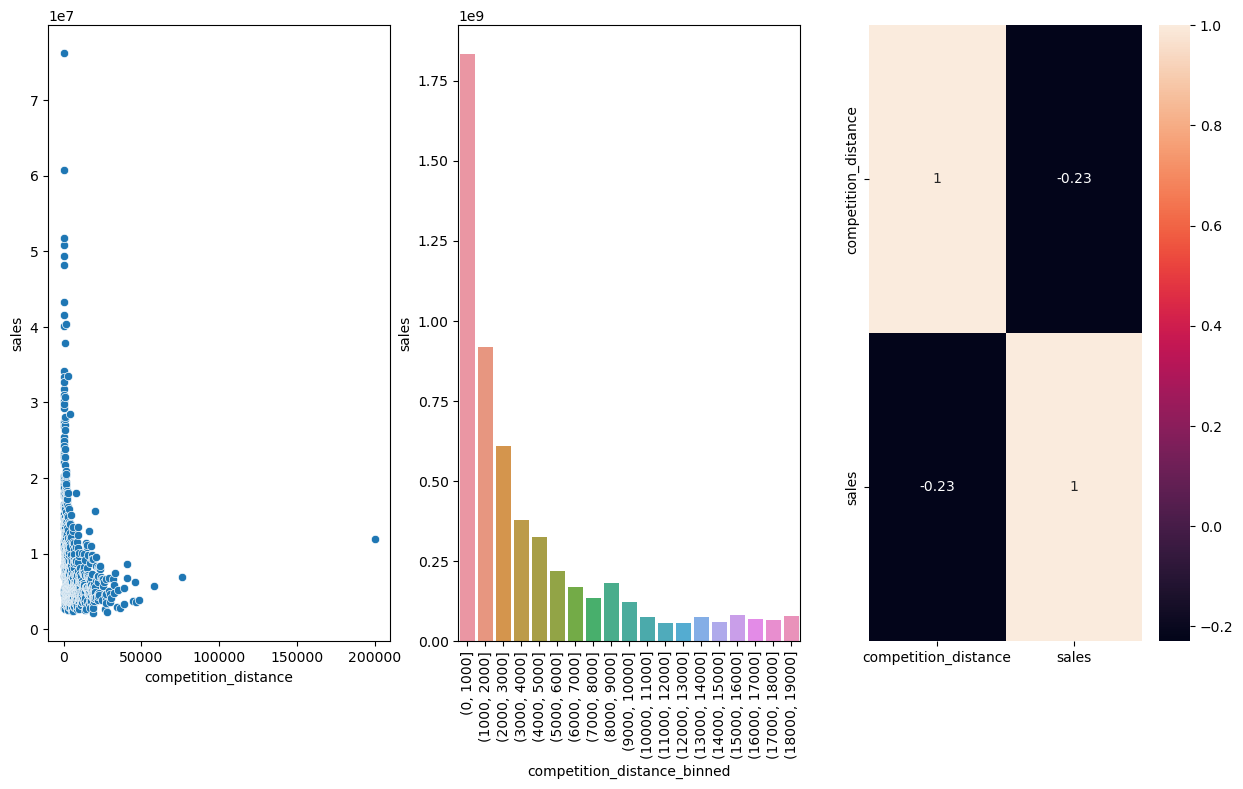

In [41]:
aux4 = df4[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()

plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
sns.scatterplot(x='competition_distance', y='sales', data=aux4);

plt.subplot(1,3,2)
bins = list(np.arange(0, 20000, 1000))
aux4['competition_distance_binned'] = pd.cut(aux4['competition_distance'], bins=bins)
aux5 = aux4[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot(x='competition_distance_binned', y='sales', data=aux5);
plt.xticks(rotation=90)

plt.subplot(1,3,3)
h = sns.heatmap(aux4.corr(method='pearson'), annot=True);

In [42]:
aux4.sample(4)

,competition_distance,sales,competition_distance_binned
411,6930.0,5050619,"(6000, 7000]"
402,6690.0,8104523,"(6000, 7000]"
239,2930.0,4919195,"(2000, 3000]"
62,640.0,7428650,"(0, 1000]"


###  **3.** Lojas com competidores a mais tempo deveriam vender mais

**FALSE** Lojas com competidores há mais tempo vendem MENOS. 

In [43]:
plt.rcParams["figure.figsize"] = (20, 15)

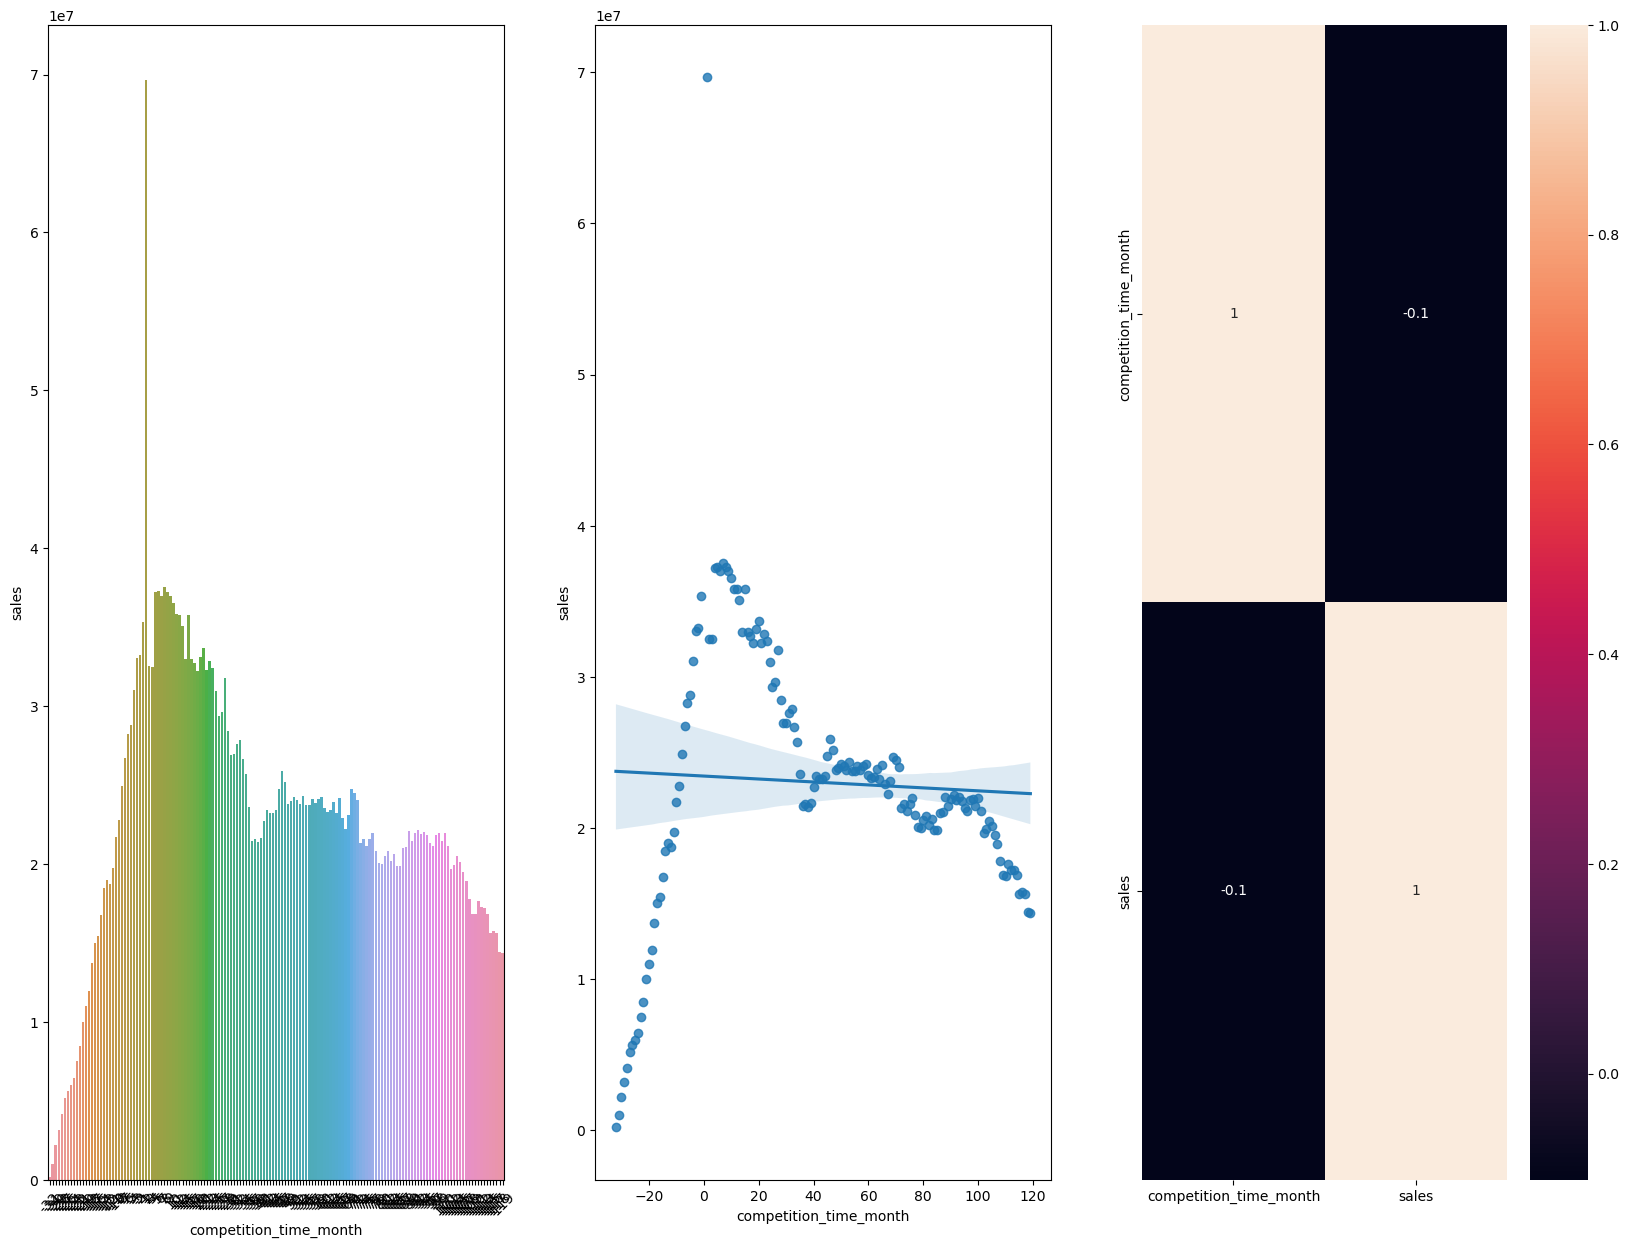

In [44]:
plt.subplot(1,3,1)
aux6 = df4[['competition_time_month', 'sales']].groupby('competition_time_month').sum().reset_index()
aux7 = aux6[(aux6['competition_time_month'] < 120) & (aux6['competition_time_month'] != 0 )]
sns.barplot(x='competition_time_month', y='sales', data=aux7);
plt.xticks(rotation=45);

plt.subplot(1,3,2)
sns.regplot(x='competition_time_month', y='sales', data=aux7);

plt.subplot(1,3,3)
x = sns.heatmap(aux6.corr(method='pearson'), annot=True);

### 4. Lojas com promoções ativas por mais tempo deveriam vender mais

**FALSA** As promoções vendem mais por um determinado tempo

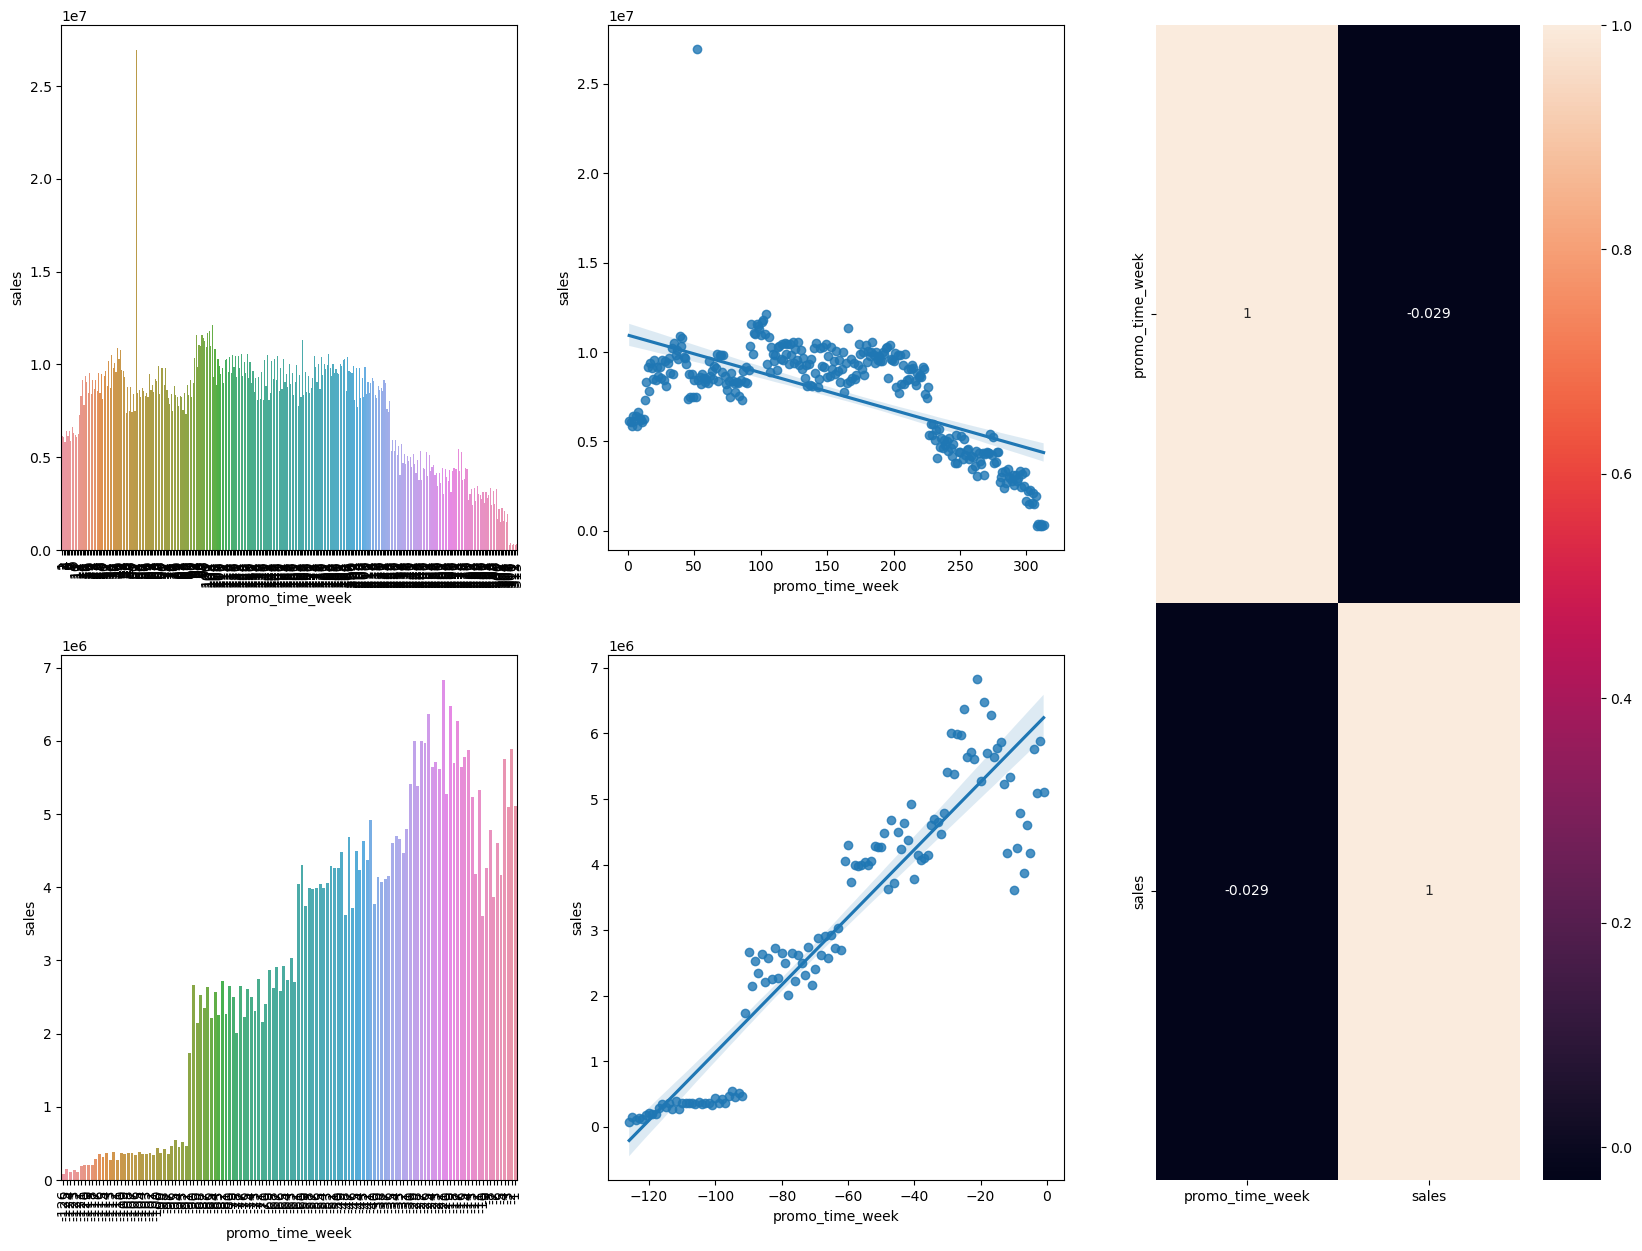

In [45]:
aux8 = df4[['promo_time_week', 'sales']].groupby('promo_time_week').sum().reset_index()

grid = GridSpec(2, 3)

plt.subplot(grid[0,0])
aux9 = aux8[aux8['promo_time_week'] > 0] #promo extendida
sns.barplot(x='promo_time_week', y='sales', data=aux9);
plt.xticks(rotation=90);

plt.subplot(grid[0,1])
sns.regplot(x='promo_time_week', y='sales', data=aux9)

plt.subplot(grid[1,0])
aux10 = aux8[aux8['promo_time_week'] < 0] #promo regular
sns.barplot(x='promo_time_week', y='sales', data=aux10 );
plt.xticks(rotation=90);

plt.subplot(grid[1,1])
sns.regplot(x='promo_time_week', y='sales', data=aux10)

plt.subplot(grid[:,2])
sns.heatmap(aux8.corr(method='pearson'), annot=True);

### <s> 5. Lojas com mais dias de promoção deveriam vender mais </s>

### 6.Lojas com mais promoções consecutivas deveriam vender mais

**FALSA** Lojas com promoções consecutivas vendem menos

In [46]:
df4[['promo', 'promo2', 'sales']].groupby(['promo', 'promo2']).sum().reset_index()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


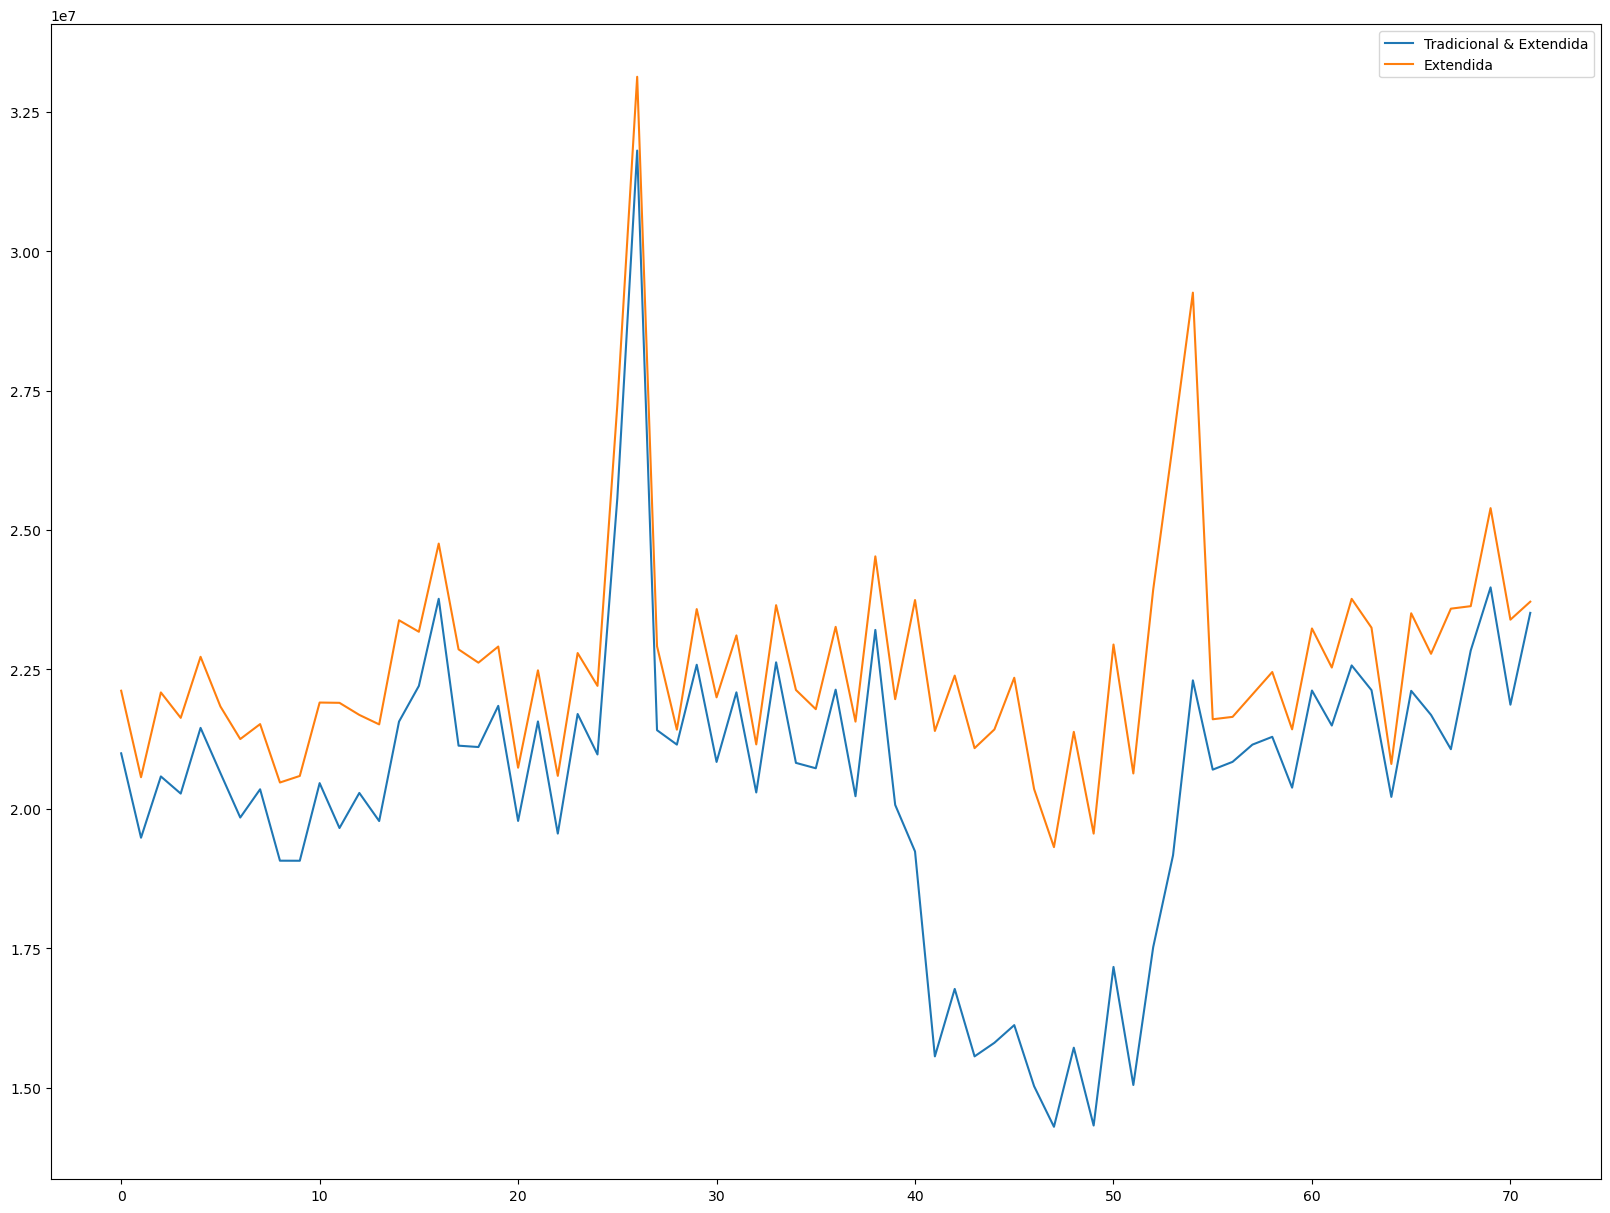

In [47]:
aux11 = df4[(df4['promo'] == 1) & (df4['promo2'] == 1)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
ax = aux11.plot()

aux12 = df4[(df4['promo'] == 1) & (df4['promo2'] == 0)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
aux12.plot(ax=ax)

ax.legend(labels =['Tradicional & Extendida', 'Extendida']);

### 7. Lojas abertas durante o feriado de Natal deveriam vender mais

**FALSA** Lojas abertas durante o feriado do Natal vendem menos


<Axes: xlabel='year', ylabel='sales'>

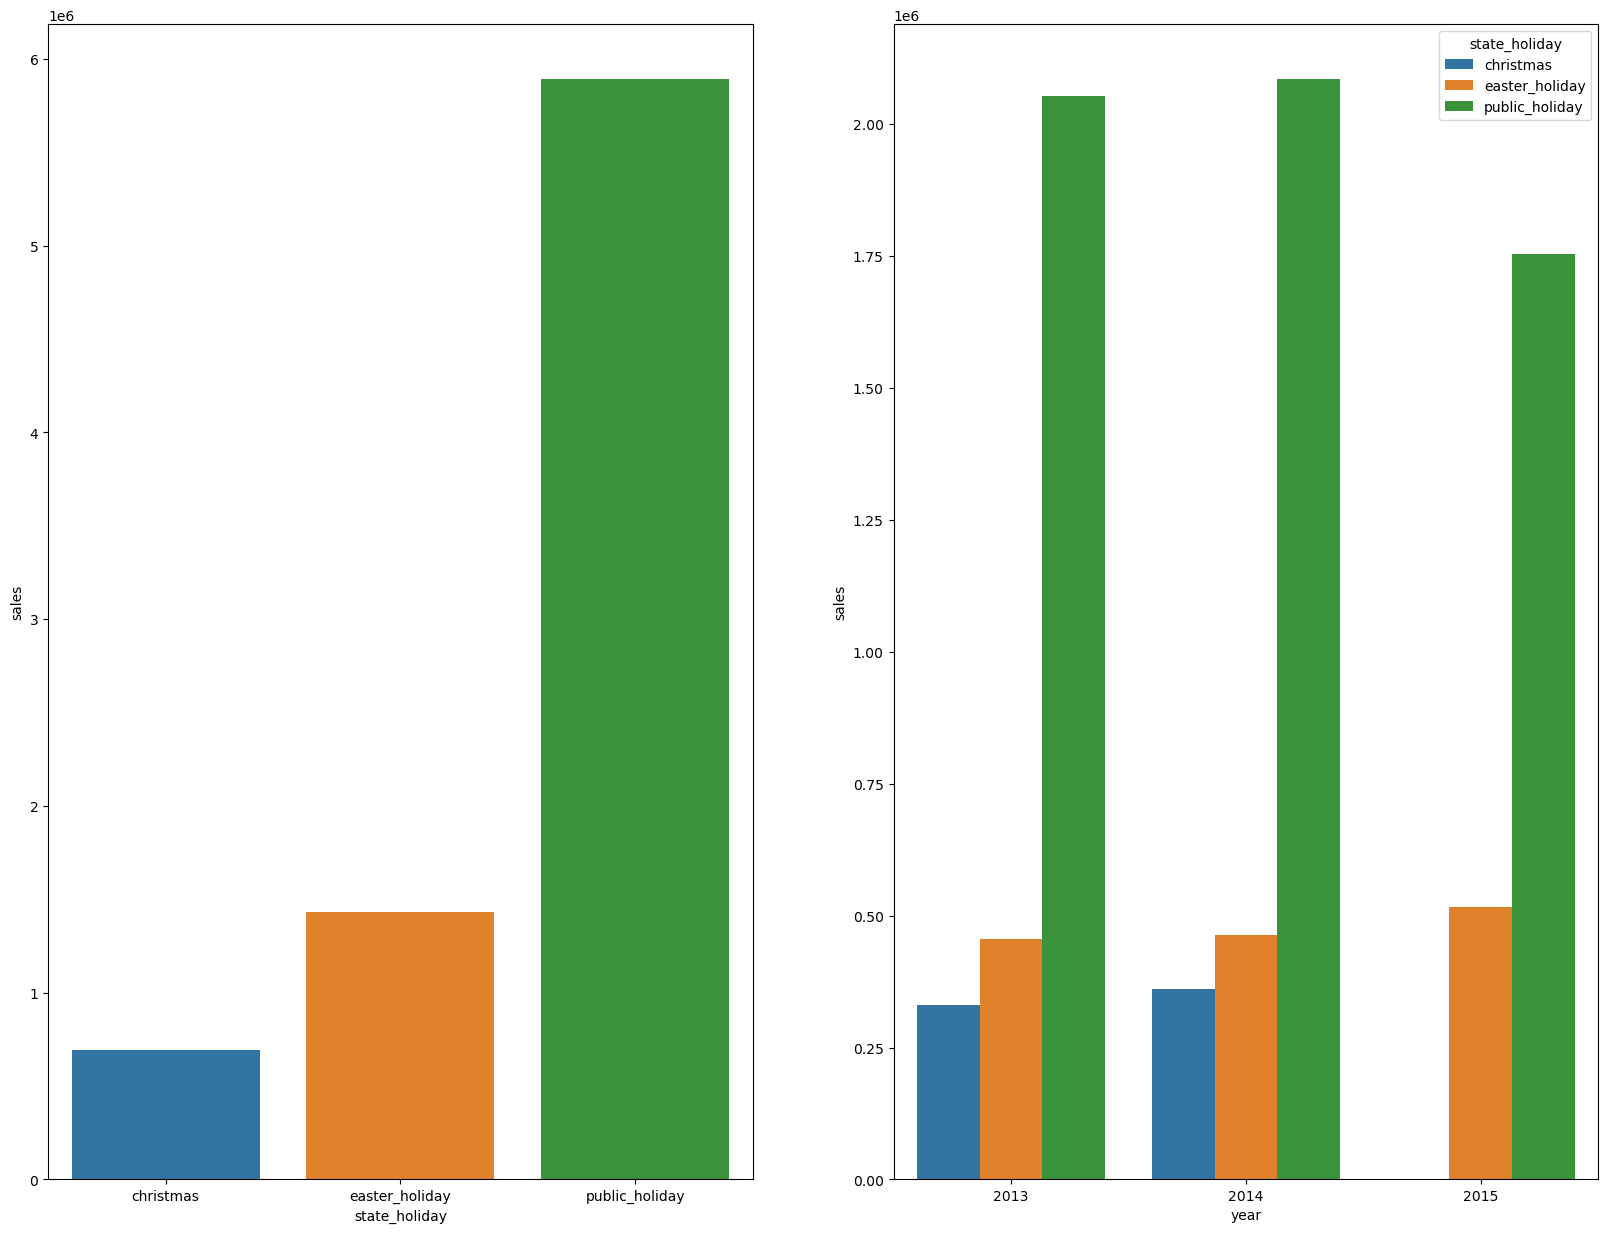

In [48]:
aux13 = df4[df4['state_holiday'] != 'regular_day']

plt.subplot(1,2,1)
aux14 = aux13[['state_holiday', 'sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x='state_holiday', y='sales', data=aux14)

plt.subplot(1,2,2)
aux15 = aux13[['year', 'state_holiday', 'sales']].groupby(['year', 'state_holiday']).sum().reset_index()
sns.barplot(x='year', y='sales', hue='state_holiday', data=aux15)

### 8 Lojas deveriam vender mais ao longo dos anos
-> os dados não possuem o ano de 2015 completo

**FALSA** Lojas vendem menos ao longo do tempo

<Axes: >

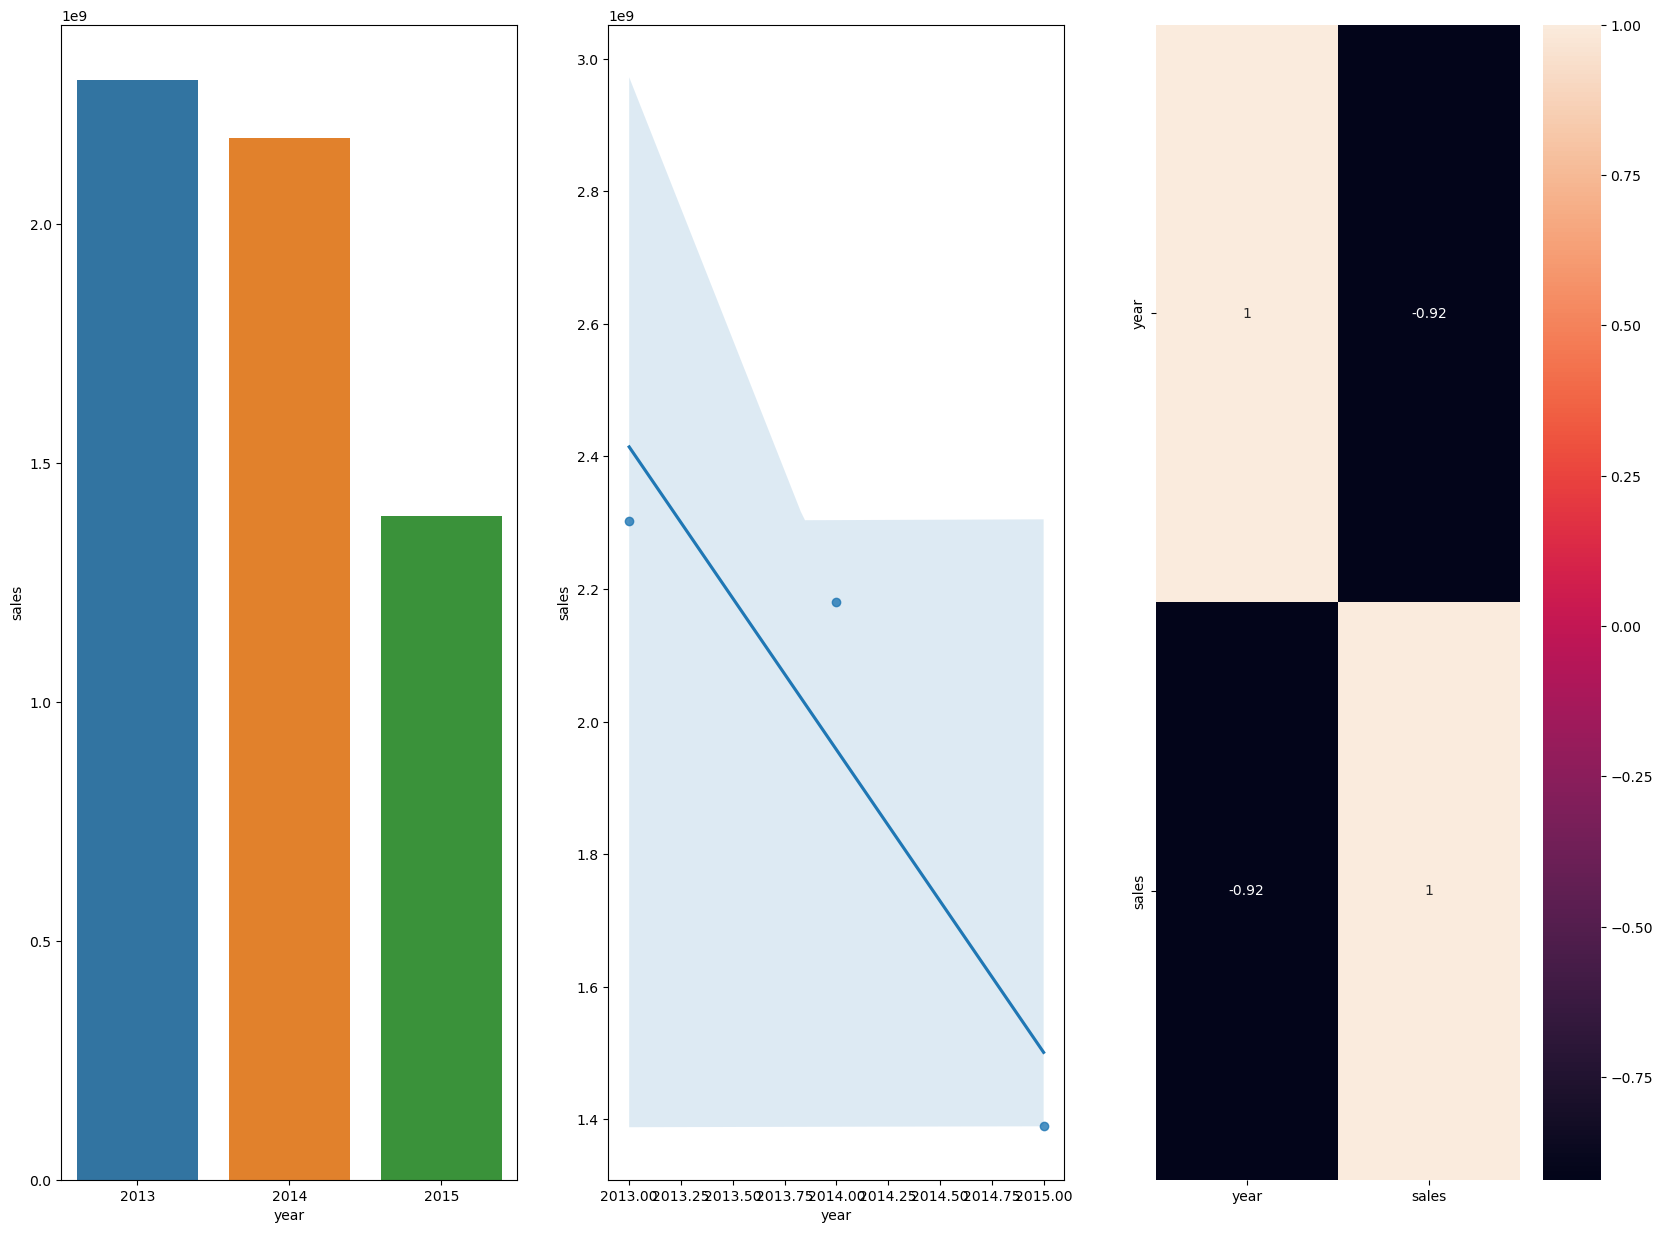

In [49]:
aux16 = df4[['year', 'sales']].groupby('year').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='year', y='sales', data=aux16);

plt.subplot(1,3,2)
sns.regplot(x='year', y='sales', data=aux16);

plt.subplot(1,3,3)
sns.heatmap(aux16.corr(method = 'pearson'), annot=True)


### 9. Lojas deveriam vender mais no segundo semestre do ano

**FALSA** Lojas menos no segundo semestre do ano

<Axes: >

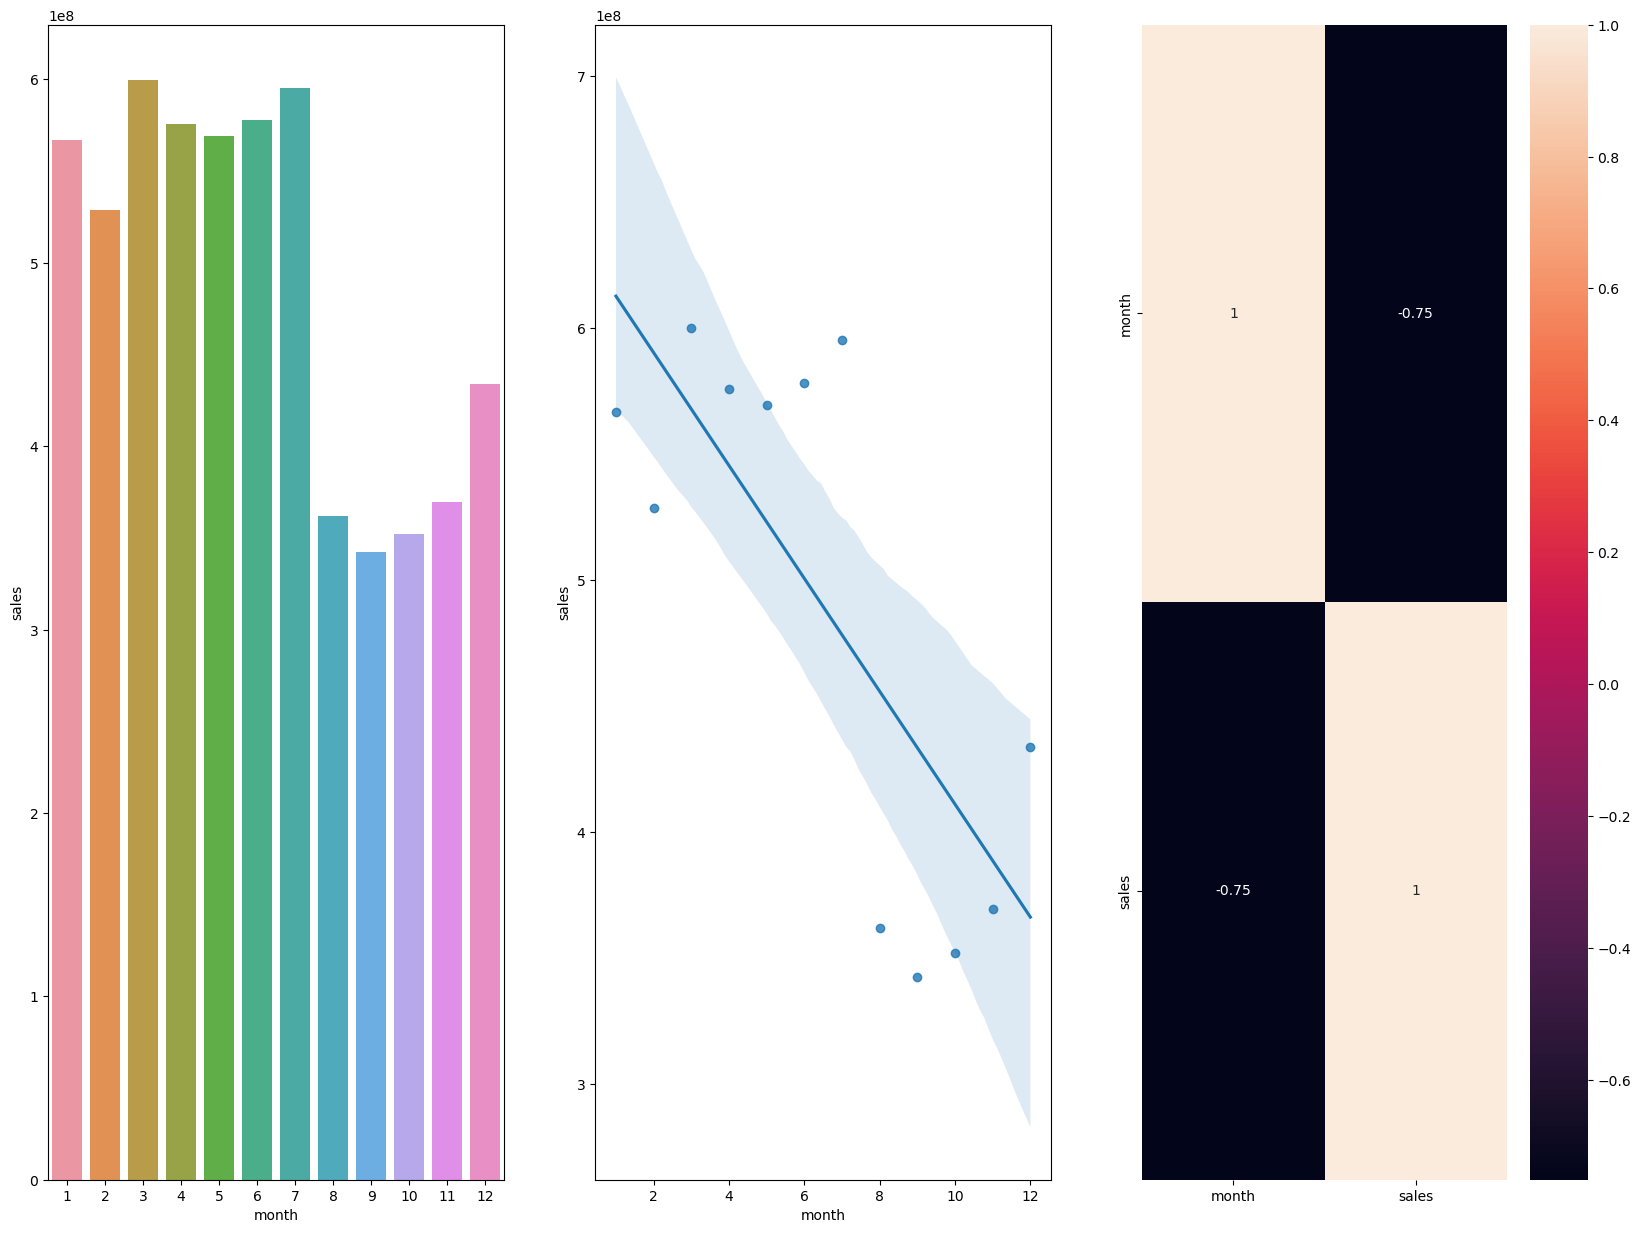

In [50]:
aux16 = df4[['month', 'sales']].groupby('month').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='month', y='sales', data=aux16);

plt.subplot(1,3,2)
sns.regplot(x='month', y='sales', data=aux16);

plt.subplot(1,3,3)
sns.heatmap(aux16.corr(method = 'pearson'), annot=True)


### 10. Lojas deveriam vender mais depois do dia 10 de cada mês

**VERDADEIRA** Lojas vendem mais depois do dia 10 de cada mês 

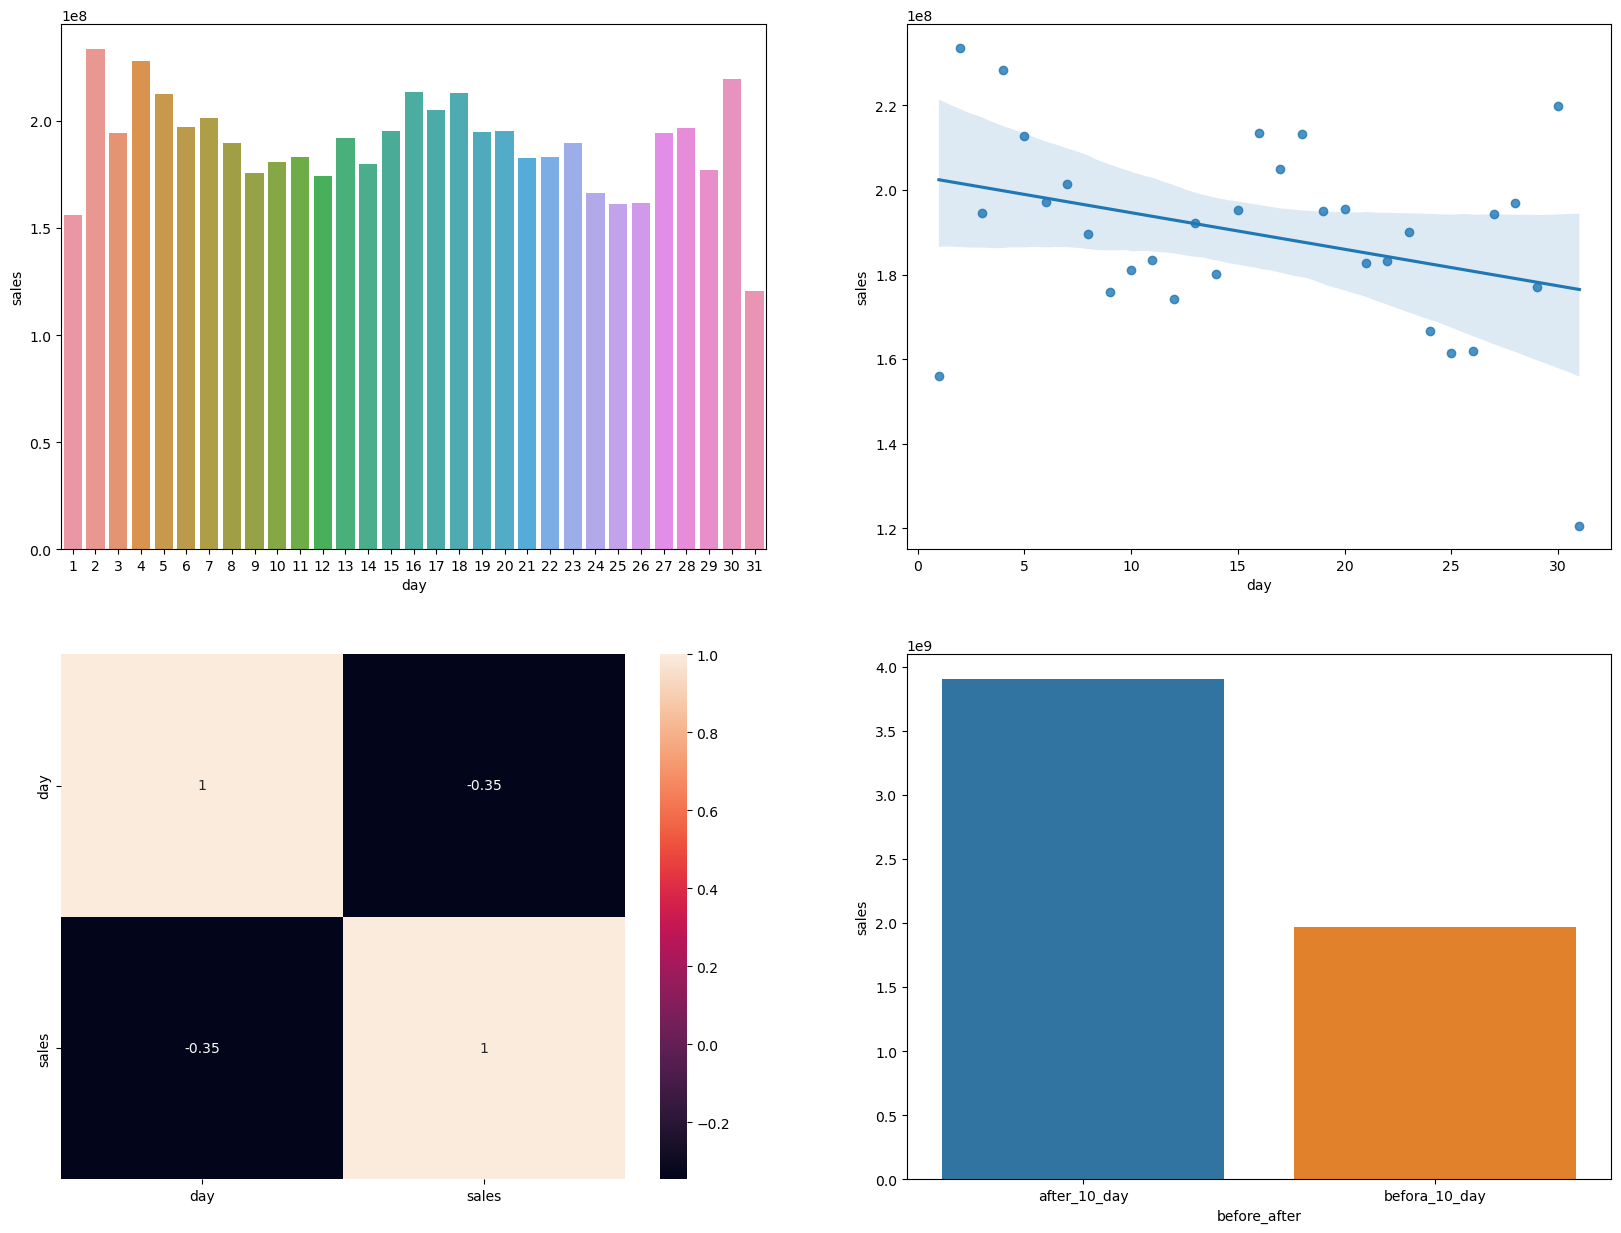

In [51]:
aux16 = df4[['day', 'sales']].groupby('day').sum().reset_index()

plt.subplot(2,2,1)
sns.barplot(x='day', y='sales', data=aux16);

plt.subplot(2,2,2)
sns.regplot(x='day', y='sales', data=aux16);

plt.subplot(2,2,3)
sns.heatmap(aux16.corr(method = 'pearson'), annot=True)

plt.subplot(2,2,4)
aux16['before_after'] = aux16['day'].apply(lambda x: 'befora_10_day' if x <= 10 else 'after_10_day')
aux17 = aux16[['before_after', 'sales']].groupby('before_after').sum().reset_index()
sns.barplot(x='before_after', y='sales', data=aux17);


### 11. Lojas deveriam vender menos aos finais de semana

**VERDADEIRA** Lojas vendem menos no final de semana

<Axes: >

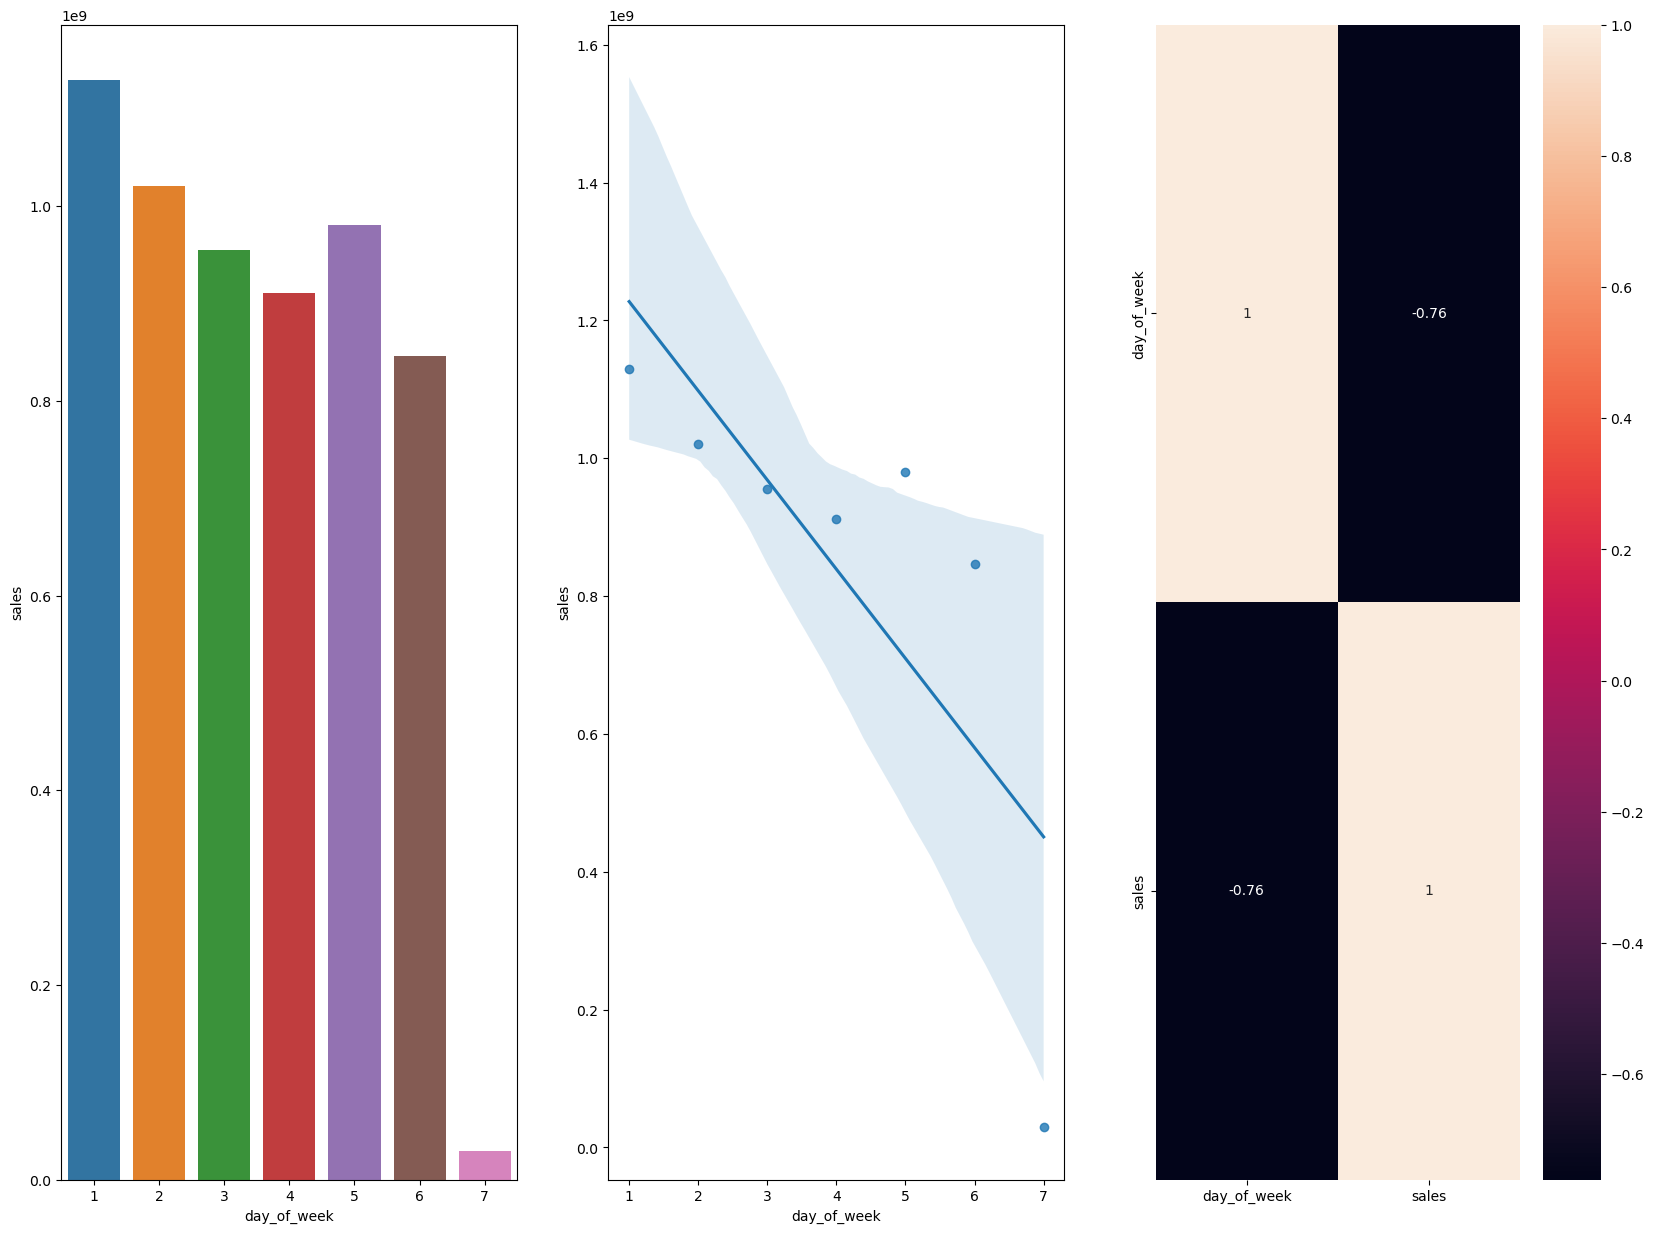

In [52]:
aux16 = df4[['day_of_week', 'sales']].groupby('day_of_week').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='day_of_week', y='sales', data=aux16);

plt.subplot(1,3,2)
sns.regplot(x='day_of_week', y='sales', data=aux16);

plt.subplot(1,3,3)
sns.heatmap(aux16.corr(method = 'pearson'), annot=True)

### 12. Lojas deveriam vender menos durante os feriado escolares

**VERDADEIRA** Vendem menos durante os feriados escolares exceto os meses de Julho e Agosto

<Axes: xlabel='month', ylabel='sales'>

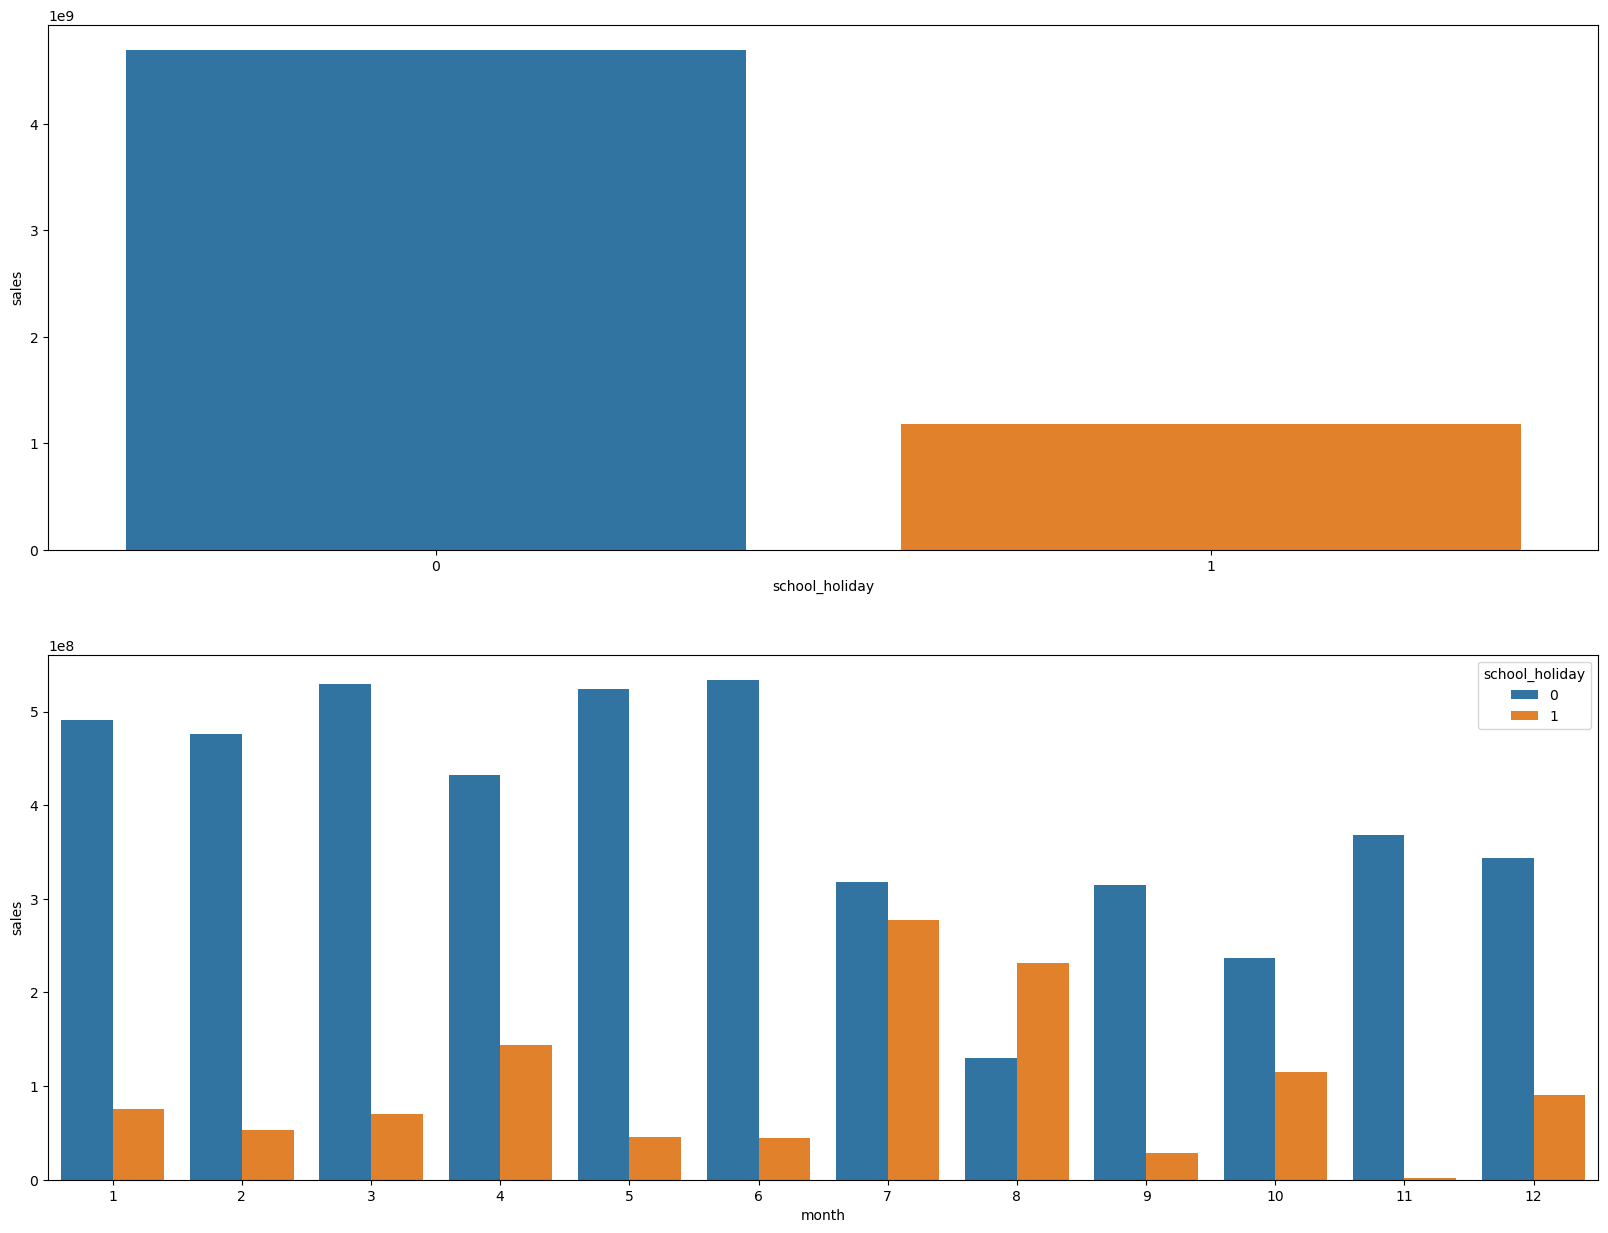

In [53]:
aux16 = df4[['school_holiday', 'sales']].groupby('school_holiday').sum().reset_index()

plt.subplot(2,1,1)
sns.barplot(x='school_holiday', y='sales', data=aux16);

plt.subplot(2,1,2)
aux17 = df4[['month','school_holiday', 'sales']].groupby(['month', 'school_holiday']).sum().reset_index()
sns.barplot(x='month', y='sales', hue='school_holiday', data=aux17)


### Resumo das hipoteses

In [54]:
tab =[['Hipoteses', 'Conclusao', 'Relevancia'],
['H1', 'Falsa', 'Baixa'],
['H2', 'Falsa', 'Media'],
['H3', 'Falsa', 'Media'],
['H4', 'Falsa', 'Baixa'],
['H5', '-', '-'],
['H6', 'Falsa', 'Baixa'],
['H7', 'Falsa', 'Media'],
['H8', 'Falsa', 'Alta'],
['H9', 'Falsa', 'Alta'],
['H10', 'Verdadeira', 'Alta'],
['H11', 'Verdadeira', 'Alta'],
['H12', 'Verdadeira', 'Baixa'],
]
print( tabulate( tab, headers='firstrow' ) )

Hipoteses    Conclusao    Relevancia
-----------  -----------  ------------
H1           Falsa        Baixa
H2           Falsa        Media
H3           Falsa        Media
H4           Falsa        Baixa
H5           -            -
H6           Falsa        Baixa
H7           Falsa        Media
H8           Falsa        Alta
H9           Falsa        Alta
H10          Verdadeira   Alta
H11          Verdadeira   Alta
H12          Verdadeira   Baixa
